# Descriptive data <a class="anchor" id="top"></a>


## TOC:
* [Data map](#bullet1)
    - [Method explanation](#sub-bullet1.1)
    - [Data map](#sub-bullet1.2)
        - [Twitter](#sub-bullet1.2.1)
        - [Reddit](#sub-bullet1.2.2)
* [Merging results](#bullet2)
* [Total social media observations](#bullet3)
    - [Tweets](#sub-bullet3.1)
    - [Reddit comments](#sub-bullet3.2)
* [Variable exploration](#bullet4)
    - [Graphing functions](#sub-bullet4.1)
    - [General findings](#sub-bullet4.0)
    - [VADER](#sub-bullet4.2)
    - [finBERT](#sub-bullet4.3)
* [Statistics](#bullet5)
    - [Trading activity measures](#sub-bullet5.1)
    - [Sentiment measures](#sub-bullet5.2)
    - [Sentiment and trading activity](#sub-bullet5.3)
* [ToDo](#ToDo)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# import statsmodels.formula.api as sm


## Results data map <a class="anchor" id="bullet1"></a>

**Method explanation** <a class="anchor" id="sub-bullet1.1"></a>

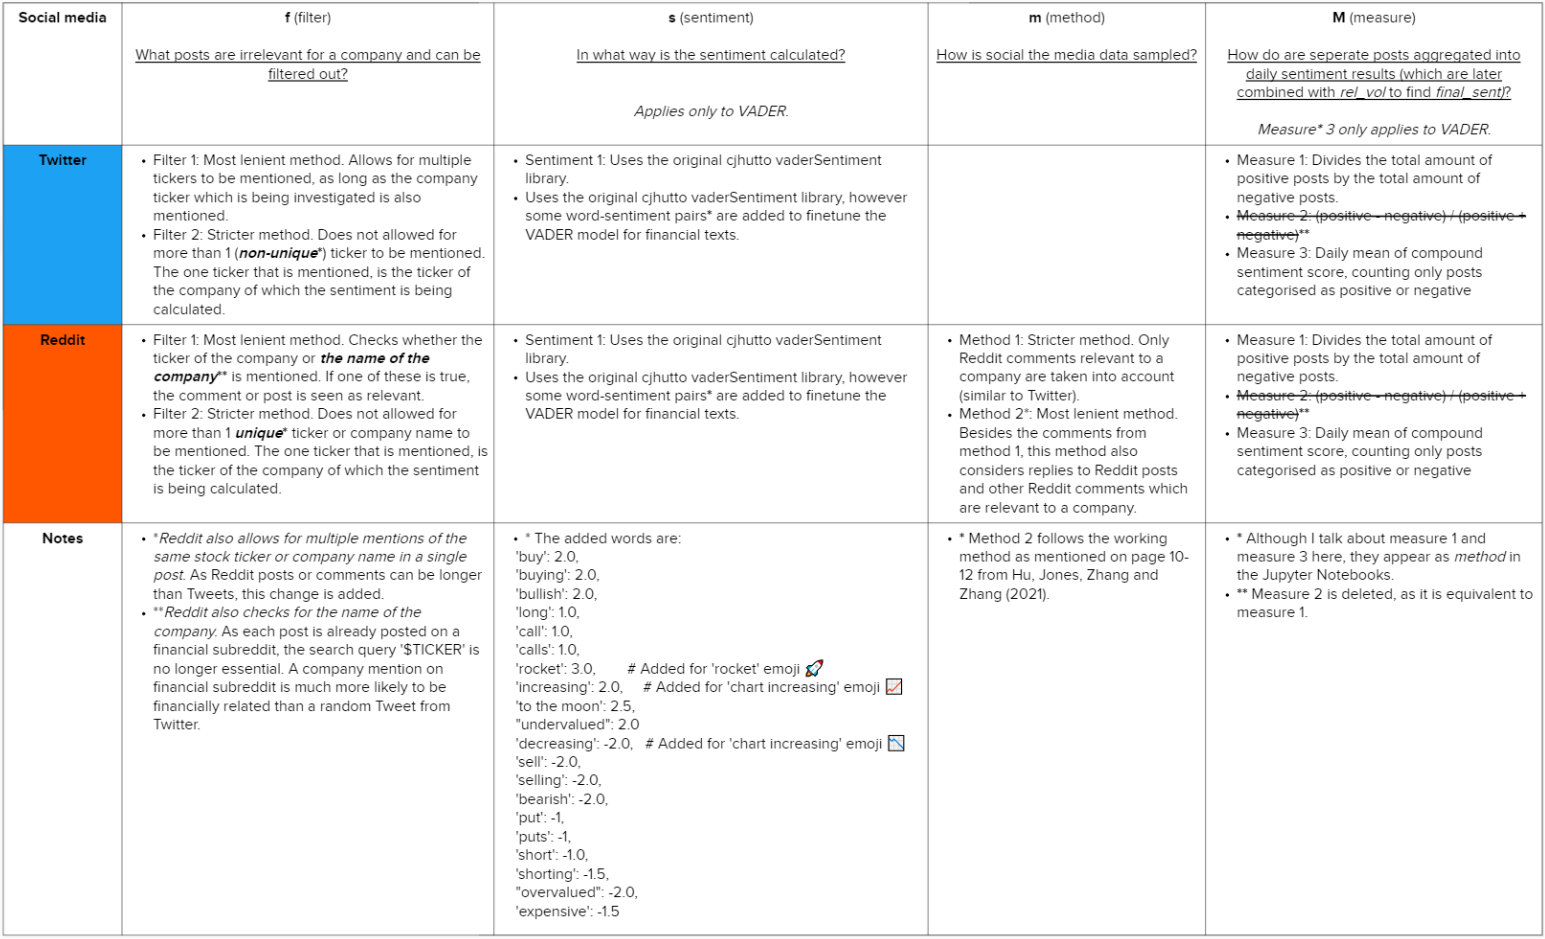

**Data map** <a class="anchor" id="sub-bullet1.2"></a>

Please see the table below for overview of all result fields generated with this research.

*Twitter* <a class="anchor" id="sub-bullet1.2.1"></a>

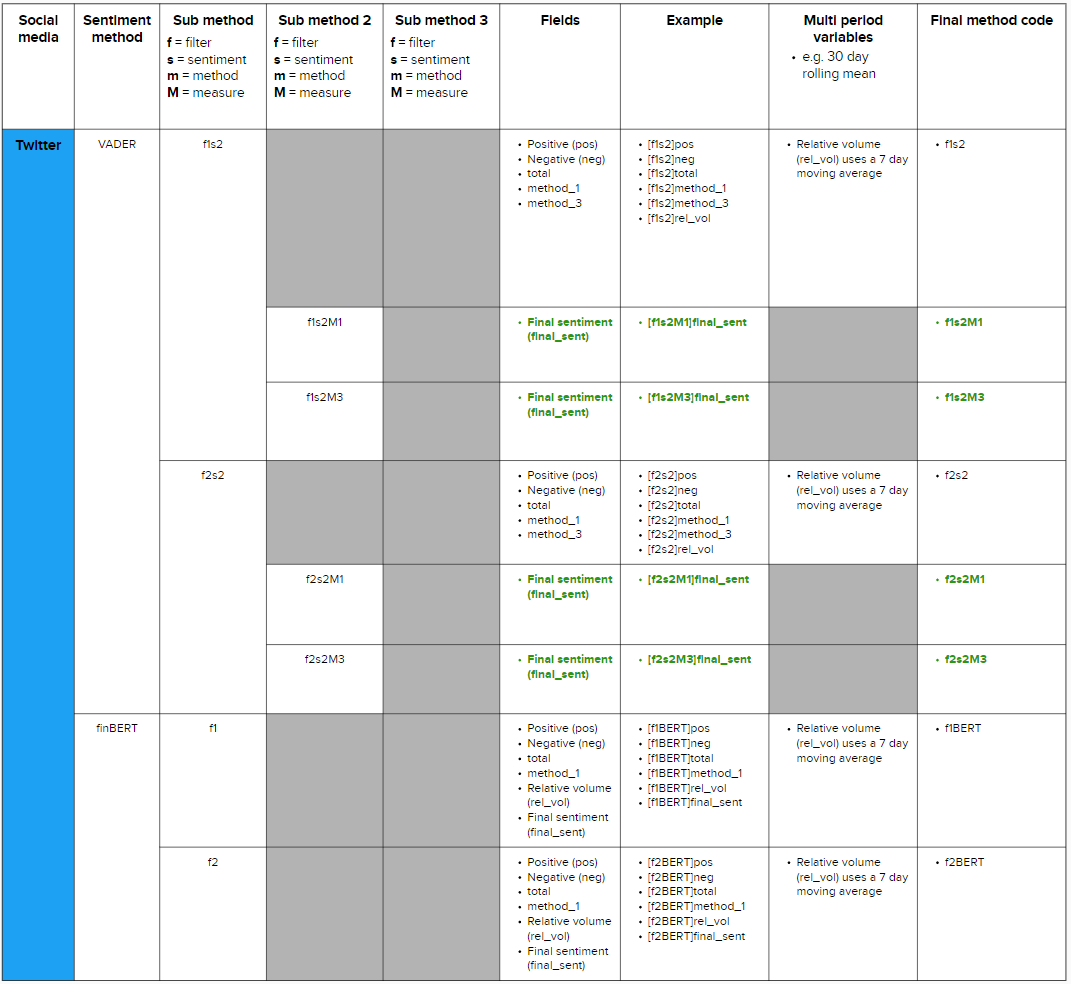

*Reddit* <a class="anchor" id="sub-bullet1.2.2"></a>

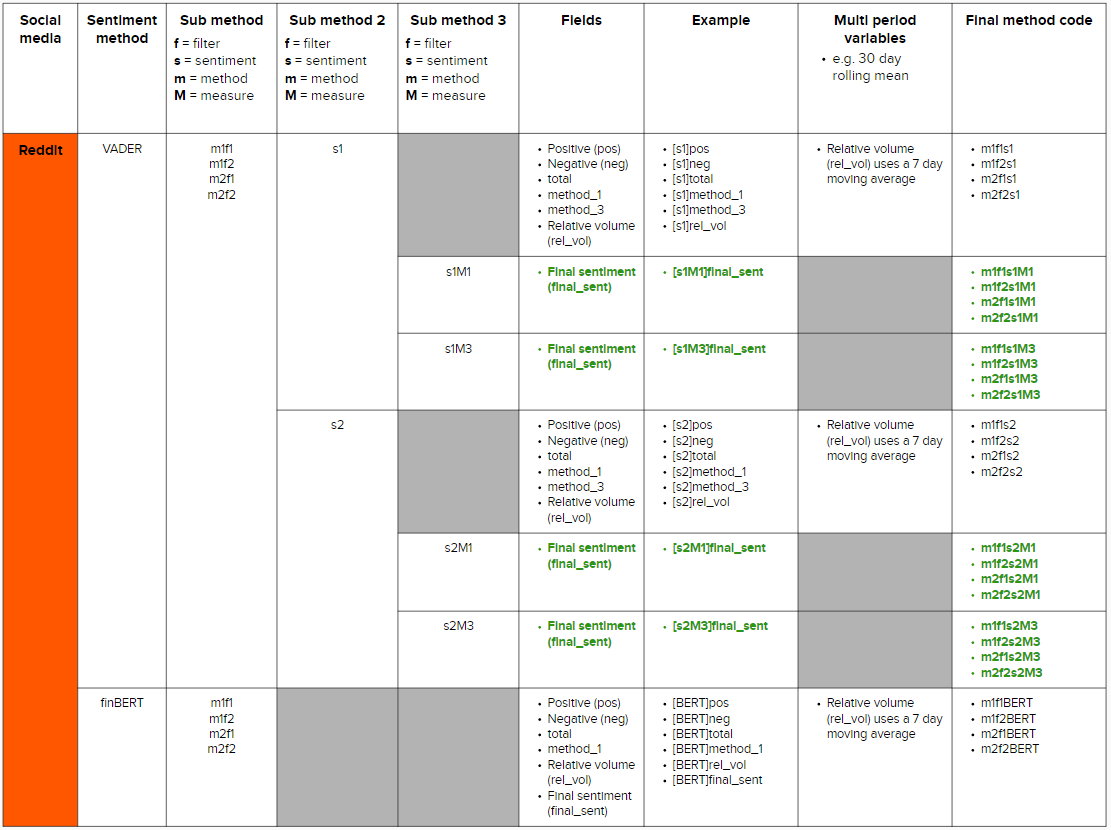

## Merging results <a class="anchor" id="bullet2"></a>

Based on the [data map](#bullet1) above, I merge all results into a single file per company.

Besides this, I label the data based on their original data source:
- Robintrack = [rh]...
- TAQ = [taq]...
- Twitter = [twit]...
- Reddit = [red]...

**Step 1 - Add Robintrack and TAQ info to results dataframe**

In [2]:
def add_robintrack_taq(results_df, ticker):
    # Path
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\robintrack_taq"
    csv_path = os.path.join(file_dir, f"{ticker}.csv").replace('\\', '/')

    # Read csv
    df = pd.read_csv(csv_path)
    
    # Rename Robinhood columns to contain [rh]
    df.columns = [str(col) if '[taq]' in str(col) or 'date' in str(col) else '[rh]' + str(col) for col in df.columns]

    # Create results_df
    results_df = df.copy()
    
    return results_df

**Step 2.1 - Add Twitter VADER**

In [3]:
def add_twitter_vader(results_df, ticker):
    # Path
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\Twitter\sentiment\VADER"
    csv_path = os.path.join(file_dir, f"{ticker}.csv").replace('\\', '/')

    # Read csv
    df = pd.read_csv(csv_path)
    
    # Rename twitter columns to contain [tw]
    df.columns = [str(col) if 'date' in str(col) else '[twit]' + str(col) for col in df.columns]


    results_df = results_df.merge(df, how='left', left_on='date', right_on='date')
    
    return results_df


**Step 2.2 - Add Twitter finBERT**

In [4]:
def add_twitter_finBERT(results_df, ticker):
    # Path
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\Twitter\sentiment\finBERT"
    csv_path = os.path.join(file_dir, f"{ticker}.csv").replace('\\', '/')
    
    # Read csv
    df = pd.read_csv(csv_path)
    
    # Rename twitter columns to contain [twit]
    df.columns = [str(col) if 'date' in str(col) else '[twit]' + str(col) for col in df.columns]

    # Merge data
    results_df = results_df.merge(df, how='left', left_on='date', right_on='date')

    return results_df



**Step 3.1 - Add Reddit VADER**

In [5]:
def add_reddit_vader(results_df, ticker):
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\VADER"
    
    folder_list = ['m1f1', 'm1f2', 'm2f1', 'm2f2']
    for folder in folder_list:
        # Path
        csv_path = os.path.join(file_dir, folder, f"{ticker}.csv").replace('\\', '/')

        # Read csv
        df = pd.read_csv(csv_path)
        
        # Add method and filter to bracket code: [s1] --> [{folder_name}s1]
        folder_prefix = folder
        df.columns = [re.sub(r'\[(.*?)\]', lambda x: f'[{folder_prefix}{x.group(1)}]', col) if '[' in col else col for col in df.columns]

        # Rename twitter columns to contain [tw]
        df.columns = [str(col) if 'date' in str(col) else '[red]' + str(col) for col in df.columns]

        # Merge data
        results_df = results_df.merge(df, how='left', left_on='date', right_on='date')
    
    return results_df

**Step 3.2 - Add Reddit VADER**

In [6]:
def add_reddit_finBERT(results_df, ticker):
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\finBERT"
    
    folder_list = ['m1f1', 'm1f2', 'm2f1', 'm2f2']
    for folder in folder_list:
        # Path
        csv_path = os.path.join(file_dir, folder, f"{ticker}.csv").replace('\\', '/')

        # Read csv
        df = pd.read_csv(csv_path)
        
        # Add method and filter to bracket code: [s1] --> [{folder_name}s1]
        folder_prefix = folder
        df.columns = [re.sub(r'\[(.*?)\]', lambda x: f'[{folder_prefix}{x.group(1)}]', col) if '[' in col else col for col in df.columns]

        # Rename twitter columns to contain [tw]
        df.columns = [str(col) if 'date' in str(col) else '[red]' + str(col) for col in df.columns]

        # Merge data
        results_df = results_df.merge(df, how='left', left_on='date', right_on='date')
    
    return results_df

**Step 4 - The glue**

In [7]:
def glue_functions(ticker):
    # Create empty df
    results_df = pd.DataFrame()
    
    # Add Robintrack & TAQ
    results_df = add_robintrack_taq(results_df, ticker)
    
    # Add Twitter
    results_df = add_twitter_vader(results_df, ticker)
    results_df = add_twitter_finBERT(results_df, ticker)
    
    # AddReddit
    results_df = add_reddit_vader(results_df, ticker)
    results_df = add_reddit_finBERT(results_df, ticker)
    
    return results_df

In [9]:
save_dir = r"E:\Users\Christiaan\Large_Files\Thesis\DATA_MERGED"
ticker_list = ['AAPL', 'AMD', 'AMZN', 'ATVI', 'BA', 'BABA', 'BAC', 'DIS', 'F', 'GE', 'GME', 'IQ', 'LULU', 'MSFT', 'MU', 'NFLX', 'NVDA', 'SBUX', 'SHOP', 'SNAP', 'SQ', 'TLRY', 'TSLA', 'V', 'WMT']

save = False

if save:
    for ticker in ticker_list:
        # Add files
        df = glue_functions(ticker)

        # Save path
        save_path = os.path.join(save_dir, f"{ticker}.csv").replace('\\', '/')
        df.to_csv(save_path, encoding='utf-8', index=False)
        print(f"Merged file saved at: {save_path}")

Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/AAPL.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/AMD.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/AMZN.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/ATVI.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/BA.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/BABA.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/BAC.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/DIS.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/F.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/GE.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/GME.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/IQ.csv
Merged file saved at: E:/User

(561, 141)
date
[rh]dayname
[rh]ticker
[rh]RHtotal_holdings
[rh]RHtotal_holdings_change
[rh]user_estimate
[rh]AUSpU
[rh]users_holding
[rh]change
[rh]pct_change
[rh]market_share
[rh]expected_position_1
[rh]performance_1
[rh]expected_position_2
[rh]performance_2
[taq]price
[taq]total_vol
[taq]buy
[taq]sell
[taq]buy_vol
[taq]sell_vol
[taq]total_bs
[taq]total_price
[taq]bs_change
[taq]vol_change
[twit][f1s2]pos
[twit][f1s2]neg
[twit][f1s2]total
[twit][f2s2]pos
[twit][f2s2]neg
[twit][f2s2]total
[twit][f1s2]method_1
[twit][f2s2]method_1
[twit][f1s2]method_3
[twit][f2s2]method_3
[twit][f1s2]rel_vol
[twit][f2s2]rel_vol
[twit][f1s2M1]final_sent
[twit][f1s2M3]final_sent
[twit][f2s2M1]final_sent
[twit][f2s2M3]final_sent
[twit][f1BERT]pos
[twit][f1BERT]neg
[twit][f1BERT]total
[twit][f2BERT]pos
[twit][f2BERT]neg
[twit][f2BERT]total
[twit][f1BERT]method_1
[twit][f2BERT]method_1
[twit][f1BERT]rel_vol
[twit][f2BERT]rel_vol
[twit][f1BERT]final_sent
[twit][f2BERT]final_sent
[red][m1f1s1]pos
[red][m1f1s1

In [125]:
results_df = glue_functions("TSLA")

In [51]:
results_df.columns

Index(['date', '[rh]dayname', '[rh]ticker', '[rh]RHtotal_holdings',
       '[rh]RHtotal_holdings_change', '[rh]user_estimate', '[rh]AUSpU',
       '[rh]users_holding', '[rh]change', '[rh]pct_change', '[rh]market_share',
       '[rh]expected_position_1', '[rh]performance_1',
       '[rh]expected_position_2', '[rh]performance_2', '[taq]price',
       '[taq]total_vol', '[taq]buy', '[taq]sell', '[taq]buy_vol',
       '[taq]sell_vol', '[taq]total_bs', '[taq]total_price', '[taq]bs_change',
       '[taq]vol_change', '[twit][f1s2]pos_x', '[twit][f1s2]neg_x',
       '[twit][f1s2]total_x', '[twit][f2s2]pos_x', '[twit][f2s2]neg_x',
       '[twit][f2s2]total_x', '[twit][f1s2]method_1_x',
       '[twit][f2s2]method_1_x', '[twit][f1s2]method_3_x',
       '[twit][f2s2]method_3_x', '[twit][f1s2]rel_vol_x',
       '[twit][f2s2]rel_vol_x', '[twit][f1s2M1]final_sent_x',
       '[twit][f1s2M3]final_sent_x', '[twit][f2s2M1]final_sent_x',
       '[twit][f2s2M3]final_sent_x', '[twit][f1s2]pos_y', '[twit][f1s

In [6]:

reddit_sent = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\VADER\m2f1\AMD.csv"
twitter_sent = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\VADER\m2f1\AMD.csv"

df_robintrack_taq = pd.read_csv(robintrack_taq)


date    dayname ticker  RHtotal_holdings  RHtotal_holdings_change  \
0    2018-05-07     Monday    AMD         5572033.0                 -15075.0   
1    2018-05-08    Tuesday    AMD         5579299.0                   7266.0   
2    2018-05-09  Wednesday    AMD         5581690.0                   2391.0   
3    2018-05-10   Thursday    AMD         5586070.0                   4380.0   
4    2018-05-11     Friday    AMD         5595100.0                   9030.0   
..          ...        ...    ...               ...                      ...   
556  2020-08-07     Friday    AMD        41955504.0                 145812.0   
557  2020-08-10     Monday    AMD        42019630.0                  64126.0   
558  2020-08-11    Tuesday    AMD        42033363.0                  13733.0   
559  2020-08-12  Wednesday    AMD        41999381.0                 -33982.0   
560  2020-08-13   Thursday    AMD        42054820.0                  55439.0   

     user_estimate     AUSpU  users_holding  change  pct_change  ...  \
0        2384615.0  2.336659         124479 -1423.0     -0.0113  ...   
1        2390000.0  2.334435         123551  -928.0     -0.0075  ...   
2        2395385.0  2.330185         122632  -919.0     -0.0074  ...   
3        2400769.0  2.326784         122279  -353.0     -0.0029  ...   
4        2406154.0  2.325329         122007  -272.0     -0.0022  ...   
..             ...       ...            ...     ...         ...  ...   
556     10478788.0  4.003851         260010   974.0      0.0038  ...   
557     10503030.0  4.000715         260437   427.0      0.0016  ...   
558     10527273.0  3.992806         260550   113.0      0.0004  ...   
559     10551515.0  3.980412         264254  3704.0      0.0142  ...   
560     10575758.0  3.976530         264849   595.0      0.0023  ...   

     [taq]price  [taq]total_vol  [taq]buy  [taq]sell  [taq]buy_vol  \
0         11.55       8293841.0    4221.0     5742.0     4010908.0   
1         11.53       4505028.0    2448.0     3457.0     2270413.0   
2         11.90       6628036.0    3150.0     5650.0     2889070.0   
3         12.09       6717426.0    4319.0     5817.0     2993545.0   
4         11.87       7441129.0    4248.0     4136.0     3825424.0   
..          ...             ...       ...        ...           ...   
556       84.96      19500994.0   31751.0    26543.0     9864170.0   
557       82.00      21367049.0   32831.0    29113.0    10760131.0   
558       78.90      20062862.0   32319.0    30913.0     9784706.0   
559       81.07      26126008.0   35969.0    31882.0    12974877.0   
560       82.53      17102407.0   28883.0    25554.0     8642479.0   

     [taq]sell_vol  [taq]total_bs  [taq]total_price  [taq]bs_change  \
0        4282933.0         9963.0      9.579386e+07         -0.1981   
1        2234615.0         5905.0      5.194297e+07         -0.1350   
2        3738966.0         8800.0      7.887363e+07         -0.3177   
3        3723881.0        10136.0      8.121368e+07         -0.1713   
4        3615705.0         8384.0      8.832620e+07          0.0130   
..             ...            ...               ...             ...   
556      9636824.0        58294.0      1.656804e+09          0.0743   
557     10606918.0        61944.0      1.752098e+09          0.0501   
558     10278156.0        63232.0      1.582960e+09          0.0231   
559     13151131.0        67851.0      2.118035e+09          0.0672   
560      8459928.0        54437.0      1.411462e+09          0.0544   

     [taq]vol_change  
0            -0.0457  
1             0.0064  
2            -0.1408  
3            -0.1138  
4             0.0312  
..               ...  
556           0.0102  
557           0.0063  
558          -0.0257  
559          -0.0085  
560           0.0088  

[561 rows x 25 columns]

## Total social media observations <a class="anchor" id="bullet3"></a>

### Tweets <a class="anchor" id="sub-bullet3.1"></a>

In [8]:
def count_obs(rootdir):
    total_tweets = 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            # Create csv_path
            csv_path = os.path.join(subdir, file)


            # Read csv
            df = pd.read_csv(csv_path)

            tweet_count = df.shape[0]
            total_tweets = total_tweets + tweet_count
            print(total_tweets, " --- ", tweet_count, " --- ", file)

In [5]:
count_obs(rootdir = r"E:\Users\Christiaan\Large_Files\Thesis\Twitter\merged")

1139624  ---  1139624  ---  AAPL.csv
1476929  ---  337305  ---  AMD.csv
2346043  ---  869114  ---  AMZN.csv
2410354  ---  64311  ---  ATVI.csv
2781112  ---  370758  ---  BA.csv
3030746  ---  249634  ---  BABA.csv
3185495  ---  154749  ---  BAC.csv
3466022  ---  280527  ---  DIS.csv
3632127  ---  166105  ---  F.csv
3825372  ---  193245  ---  GE.csv
3856291  ---  30919  ---  GME.csv
3913987  ---  57696  ---  IQ.csv
3975923  ---  61936  ---  LULU.csv
4390720  ---  414797  ---  MSFT.csv
4535968  ---  145248  ---  MU.csv
5060693  ---  524725  ---  NFLX.csv
5383259  ---  322566  ---  NVDA.csv
5490868  ---  107609  ---  SBUX.csv
5637179  ---  146311  ---  SHOP.csv
5790159  ---  152980  ---  SNAP.csv
5955964  ---  165805  ---  SQ.csv
6140681  ---  184717  ---  TLRY.csv
8700781  ---  2560100  ---  TSLA.csv
8829724  ---  128943  ---  V.csv
8995667  ---  165943  ---  WMT.csv


### Reddit comments <a class="anchor" id="sub-bullet3.2"></a>

In [6]:
csv_path = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\comments\all_comments.csv"

total_comments = 0
chunksize = 10 ** 6
with pd.read_csv(csv_path, chunksize=chunksize) as reader:
    for chunk in reader:
        comment_amount = chunk.shape[0]
        total_comments = total_comments + comment_amount
        print(comment_amount, " --- ", total_comments)

1000000  ---  1000000
1000000  ---  2000000
1000000  ---  3000000
1000000  ---  4000000
1000000  ---  5000000
1000000  ---  6000000
1000000  ---  7000000
1000000  ---  8000000
1000000  ---  9000000
1000000  ---  10000000
1000000  ---  11000000
1000000  ---  12000000
1000000  ---  13000000
1000000  ---  14000000
1000000  ---  15000000
1000000  ---  16000000
1000000  ---  17000000
1000000  ---  18000000
1000000  ---  19000000
1000000  ---  20000000
511418  ---  20511418


**Most lenient filter**

In [10]:
count_obs(rootdir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\method_2\filter_1")

267377  ---  267377  ---  AAPL.csv
534443  ---  267066  ---  AMD.csv
769571  ---  235128  ---  AMZN.csv
778520  ---  8949  ---  ATVI.csv
866620  ---  88100  ---  BA.csv
889384  ---  22764  ---  BABA.csv
900953  ---  11569  ---  BAC.csv
1032602  ---  131649  ---  DIS.csv
1217632  ---  185030  ---  F.csv
1223867  ---  6235  ---  GE.csv
1238832  ---  14965  ---  GME.csv
1246777  ---  7945  ---  IQ.csv
1253096  ---  6319  ---  LULU.csv
1372074  ---  118978  ---  MSFT.csv
1386986  ---  14912  ---  MU.csv
1476593  ---  89607  ---  NFLX.csv
1515218  ---  38625  ---  NVDA.csv
1540196  ---  24978  ---  SBUX.csv
1564931  ---  24735  ---  SHOP.csv
1603604  ---  38673  ---  SNAP.csv
1666077  ---  62473  ---  SQ.csv
1684781  ---  18704  ---  TLRY.csv
2104621  ---  419840  ---  TSLA.csv
2160089  ---  55468  ---  V.csv
2211951  ---  51862  ---  WMT.csv


**Most strict filter**

In [12]:
count_obs(rootdir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\comments\filtered\filter_2")

52754  ---  52754  ---  AAPL.csv
130622  ---  77868  ---  AMD.csv
172783  ---  42161  ---  AMZN.csv
173712  ---  929  ---  ATVI.csv
196645  ---  22933  ---  BA.csv
199844  ---  3199  ---  BABA.csv
201544  ---  1700  ---  BAC.csv
233941  ---  32397  ---  DIS.csv
249847  ---  15906  ---  F.csv
250460  ---  613  ---  GE.csv
252987  ---  2527  ---  GME.csv
253634  ---  647  ---  IQ.csv
254566  ---  932  ---  LULU.csv
276006  ---  21440  ---  MSFT.csv
280848  ---  4842  ---  MU.csv
301653  ---  20805  ---  NFLX.csv
306070  ---  4417  ---  NVDA.csv
311662  ---  5592  ---  SBUX.csv
315880  ---  4218  ---  SHOP.csv
321575  ---  5695  ---  SNAP.csv
323921  ---  2346  ---  SQ.csv
326233  ---  2312  ---  TLRY.csv
441263  ---  115030  ---  TSLA.csv
450742  ---  9479  ---  V.csv
462300  ---  11558  ---  WMT.csv


## Variable exploration <a class="anchor" id="bullet4"></a>

### Graphing functions <a class="anchor" id="sub-bullet4.1"></a>

In [2]:
from sklearn.preprocessing import MinMaxScaler
import colorsys
import random

def scale_df(df, exclude_cols=['date', '[rh]dayname', '[rh]ticker', '[taq]price']):
    # Initialize scaler
    scaler = MinMaxScaler()  

    # Select columns to scale
    cols_to_scale = df.columns[~df.columns.isin(exclude_cols)]

    # Scale columns
    scaled_values = scaler.fit_transform(df[cols_to_scale])

    # Create new DataFrame with scaled values
    scaled_df = pd.DataFrame(data=scaled_values, columns=cols_to_scale)

    # Concatenate scaled DataFrame with non-scaled columns
    df_scaled = pd.concat([df[exclude_cols], scaled_df], axis=1)
    
    return df_scaled

def lighter_shade(hex_color):
    # Convert the hex color code to an RGB tuple
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
    
    # Convert the RGB values to HLS (hue, lightness, saturation) values
    h, l, s = colorsys.rgb_to_hls(r/255, g/255, b/255)
    
    # Increase the lightness by 20%
    l += 0.2
    
    # Convert the updated HLS values back to RGB values
    r, g, b = tuple(int(i * 255) for i in colorsys.hls_to_rgb(h, l, s))
    
    # Convert the updated RGB values back to a hex color code
    hex_code = f"#{r:02x}{g:02x}{b:02x}"
    
    return hex_code

def random_colour():
    colour = "#%06x" % random.randint(0, 0xFFFFFF)
    return colour

def debug_print(msg, debug=True):
    if debug:
        print(msg)


In [3]:
def plot_graph(df, ticker, y1, y2='[taq]price', x='date', y1_label="", y2_label="", rolling=1, rolling_y2=1, debug=False):

    fig, ax1 = plt.subplots(figsize=(15, 10))
    
    # Colours    
    colour_dict = {
    'colour_1': "#1f77b4",
    'colour_2': "#ff7f0e",
    'colour_3': "#2ca02c",
    'colour_4': "#d62728",
    'colour_5': "#9467bd",
    'colour_6': "#8c564b",
    'colour_7': "#e377c2"
    }
    
    # Dict to track column names and colours
    assigned_colour = {}
    
    colour_count = 1
    # Loop columns in input y1 list. If column name is same, then take same colour, with different gradient.
    for y in y1:
        # Filter column name
        assigned_col = ']'.join(y.split(']')[0:-1]) + ']'
        debug_print(assigned_col, debug)
        
        # If it is a TAQ column, set line thickness to 2.5, else 2
        if 'taq' in assigned_col:
            lw = 2.5
        else:
            lw = 2
        
        # If column title is already graphed, then create a shaded colour line
        if assigned_col in assigned_colour.keys():
            debug_print(f"{y} is getting a lighter shaded colour", debug)
            # Get lighter shade of colour
            colour = lighter_shade(assigned_colour[assigned_col])
            ax1.plot(df[x], df[y].rolling(rolling).mean(), label=y, color=colour, lw=lw)
            
            # Updating colour_dict
            assigned_colour[assigned_col] = colour
            
        # If colour_count is <= length(dict) and 
        elif colour_count <= len(colour_dict):
            debug_print(f"{y} is getting a new colour", debug)
            # Get a suitable colour for graph line
            colour = colour_dict[f'colour_{colour_count}']
            ax1.plot(df[x], df[y].rolling(rolling).mean(), label=y, color=colour, lw=lw)
            
            # Register colour
            assigned_colour[assigned_col] = colour
            
            # Increase colour count
            colour_count += 1
        # Else, give random colour if all colours have been used
        else:
            debug_print(f"{y} is getting a random colour", debug)
            ax1.plot(df[x], df[y].rolling(rolling).mean(), label=y, color=random_colour(), lw=1.0) 
    
    # General graph setup
    if len(y2) > 0:
        ax2 = ax1.twinx()
        ax2.plot(df[x], df[y2].rolling(rolling_y2).mean(), label=y2_label, color="#aa22ff", lw=2.5)
        ax2.set_ylabel(''.join(y2), fontsize=14)
        ax2.tick_params(axis="y")
        ax2.legend(loc = "upper right")
     
    
    ax1.set_xlabel(x)
    ax1.set_ylabel(y1_label, fontsize=14)
    ax1.tick_params(axis="y")
    ax1.grid()
    

    
    ax1.legend(loc = "upper left")
    fig.suptitle(f"[{ticker}] variables vs {y2_label}", fontsize=20)
    
    fig.autofmt_xdate()
    plt.show()




**Main function**

In [5]:
def import_csv(ticker):
    # Path
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\DATA_MERGED"
    csv_path = os.path.join(file_dir, f"{ticker}.csv").replace('\\', '/')

    # Create df
    df = pd.read_csv(csv_path)
    
    return df

In [6]:
def show_graph(ticker_list, y1, y1_label, y2, y2_label, rolling, rolling_y2=1, normalize=True, debug=False):
    
    for ticker in ticker_list:
        df = import_csv(ticker)

        # Set date to datetime
        df['date'] = pd.to_datetime(df['date'])


        # Normalize values to 0-1 range
        if normalize:
            df = scale_df(df, exclude_cols=['date', '[rh]dayname', '[rh]ticker', '[taq]price'])

        plot_graph(df, ticker, y1=y1, y1_label=y1_label, y2=y2, y2_label=y2_label, rolling=rolling, rolling_y2=rolling_y2, debug=debug)


### General findings <a class="anchor" id="sub-bullet4.0"></a>

Price vs [taq]total_vol | [taq]total_bs

In [24]:
ticker_list = ["AAPL", "AMZN"]

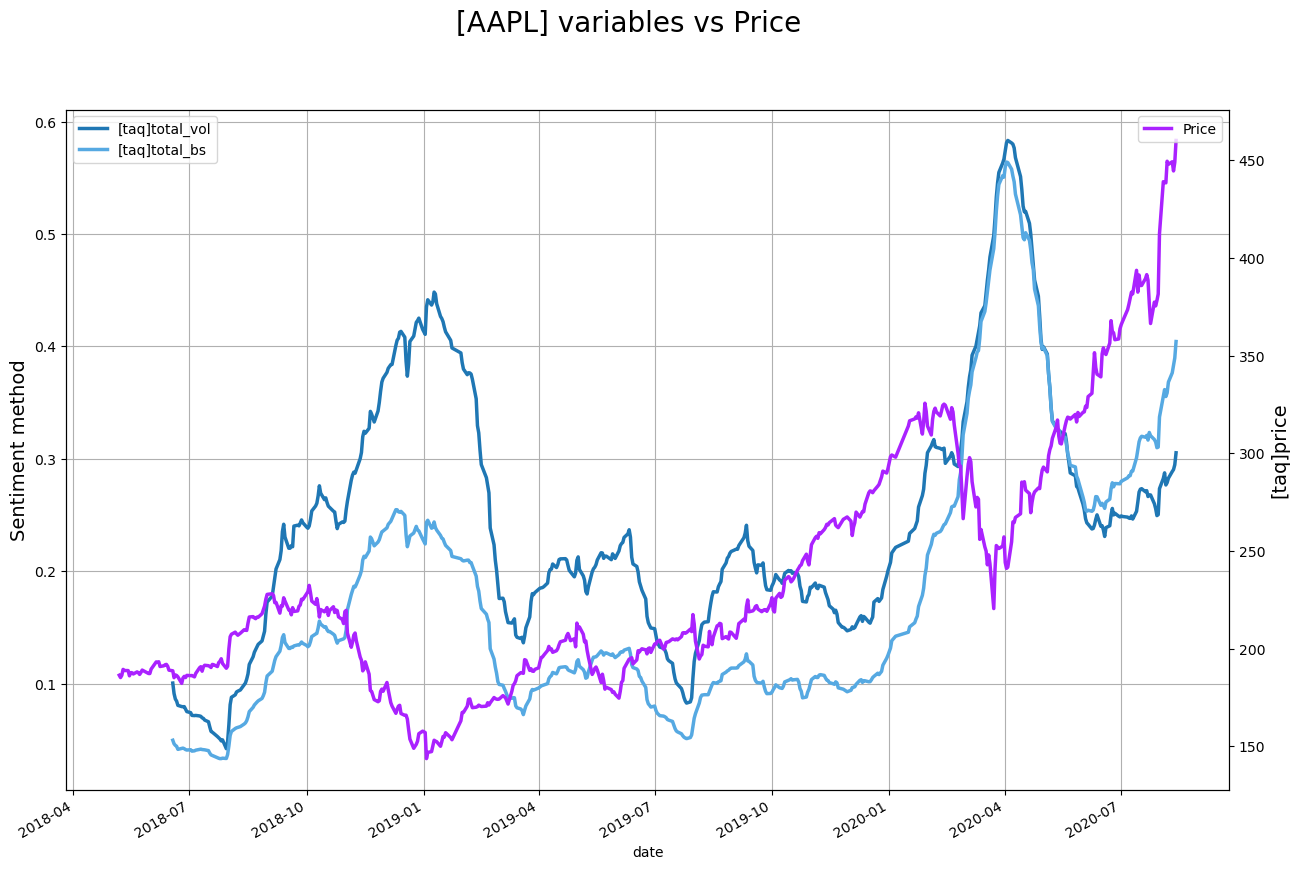

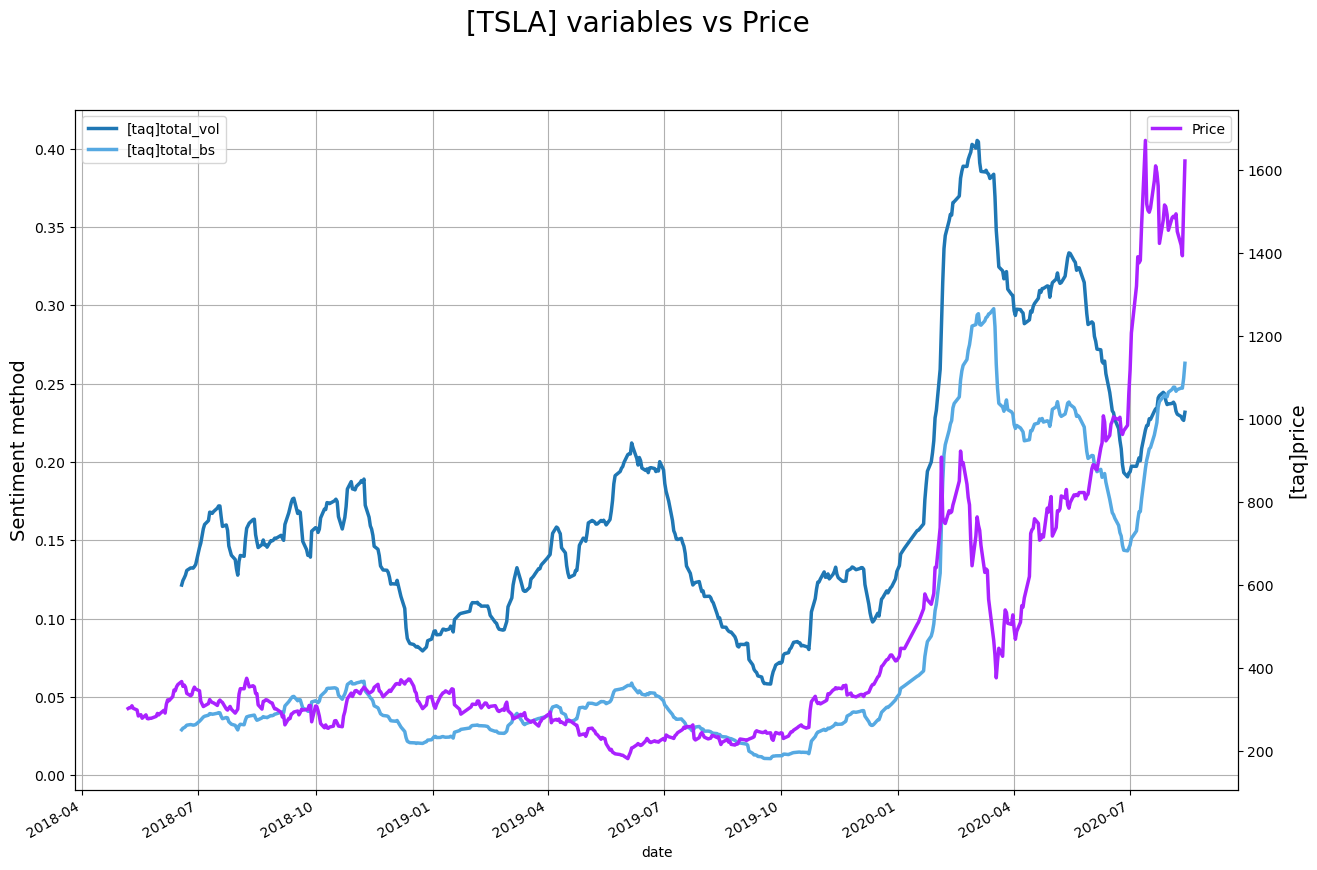

In [26]:
y1 = ['[taq]total_vol',
      '[taq]total_bs'
     ]

y2 = '[taq]price' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


[taq]total_vol | [taq]total_bs | [rh]performance_1 | [rh]performance_2

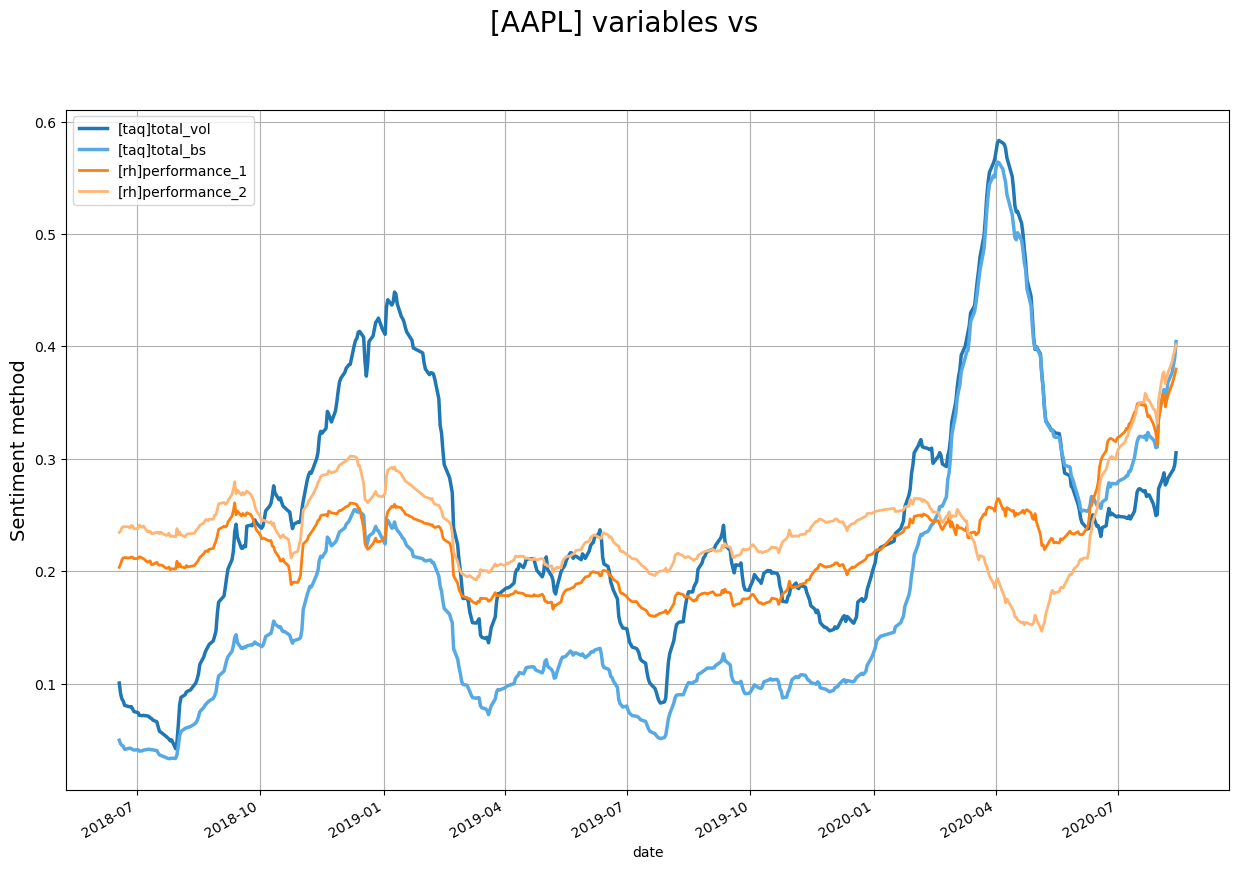

In [194]:
y1 = ['[taq]total_vol',
      '[taq]total_bs',
      '[rh]performance_1',
      '[rh]performance_2'
     ]

y2 = '' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="", rolling=30, normalize=True, debug=False)


[taq]vol_change | [taq]bs_change | [rh]performance_1 | [rh]performance_2

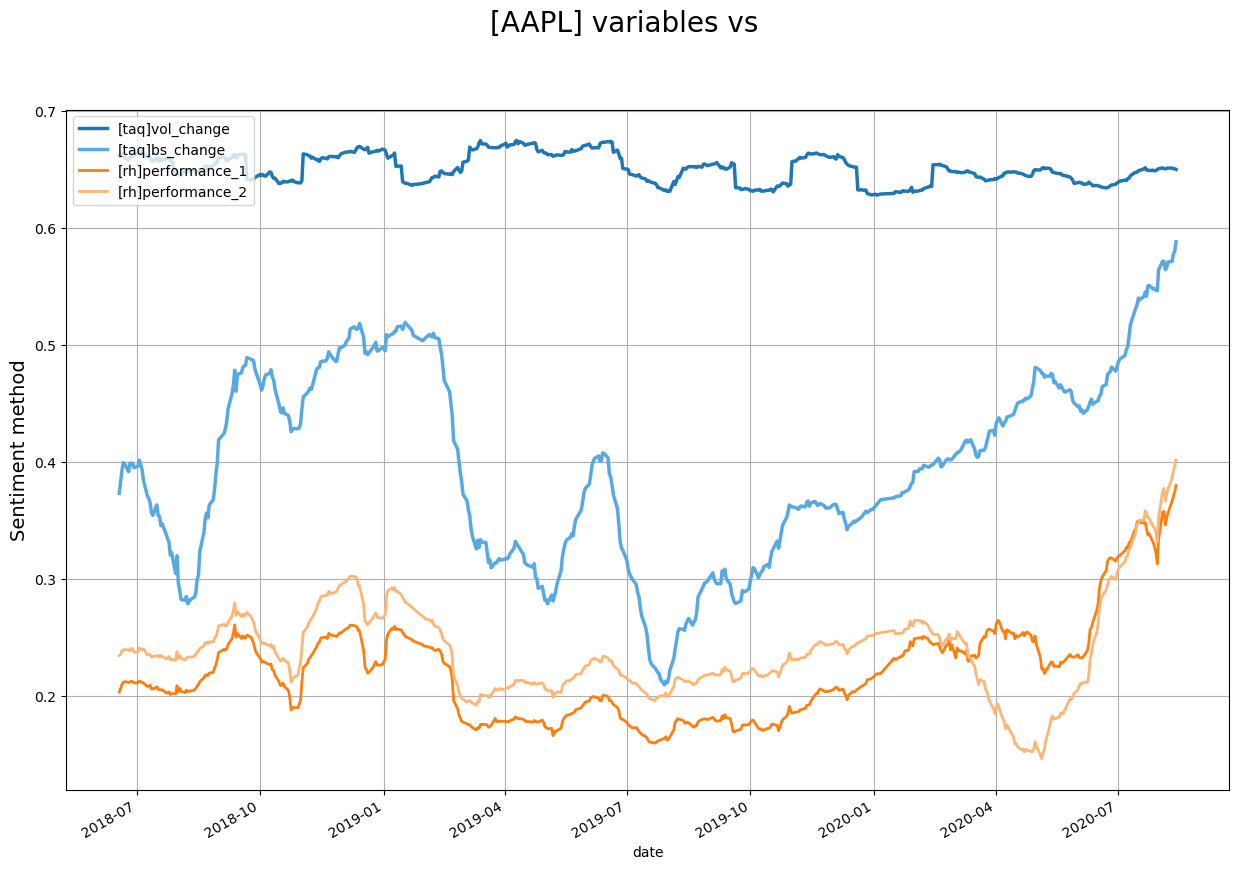

In [195]:
y1 = ['[taq]vol_change',
      '[taq]bs_change',
      '[rh]performance_1',
      '[rh]performance_2'
     ]

y2 = '' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="", rolling=30, normalize=True, debug=False)


### VADER <a class="anchor" id="sub-bullet4.2"></a>

**Twitter vs Reddit**

Sentiment Twitter (NOT accounting for volume) ~ Sentiment Reddit (NOT accounting for volume)

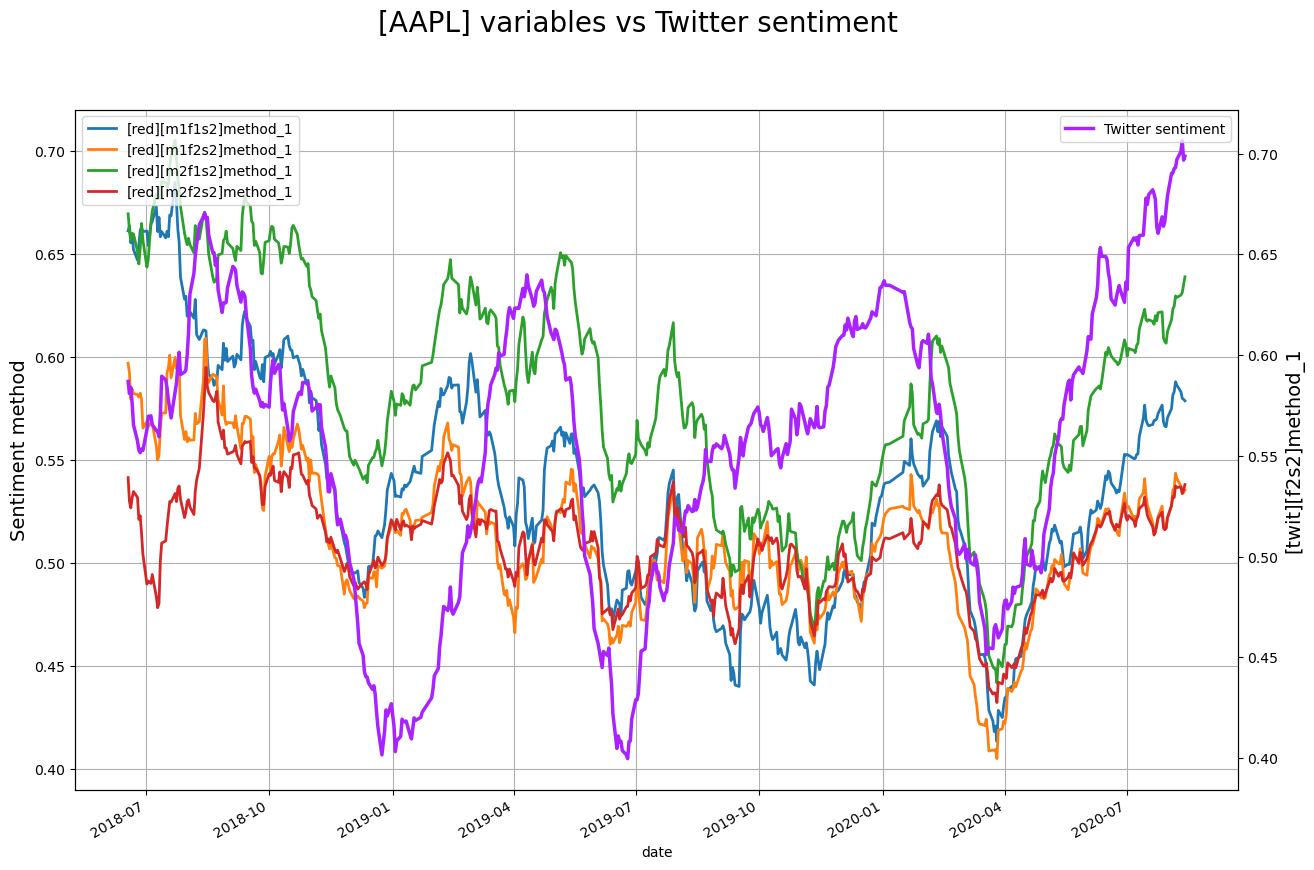

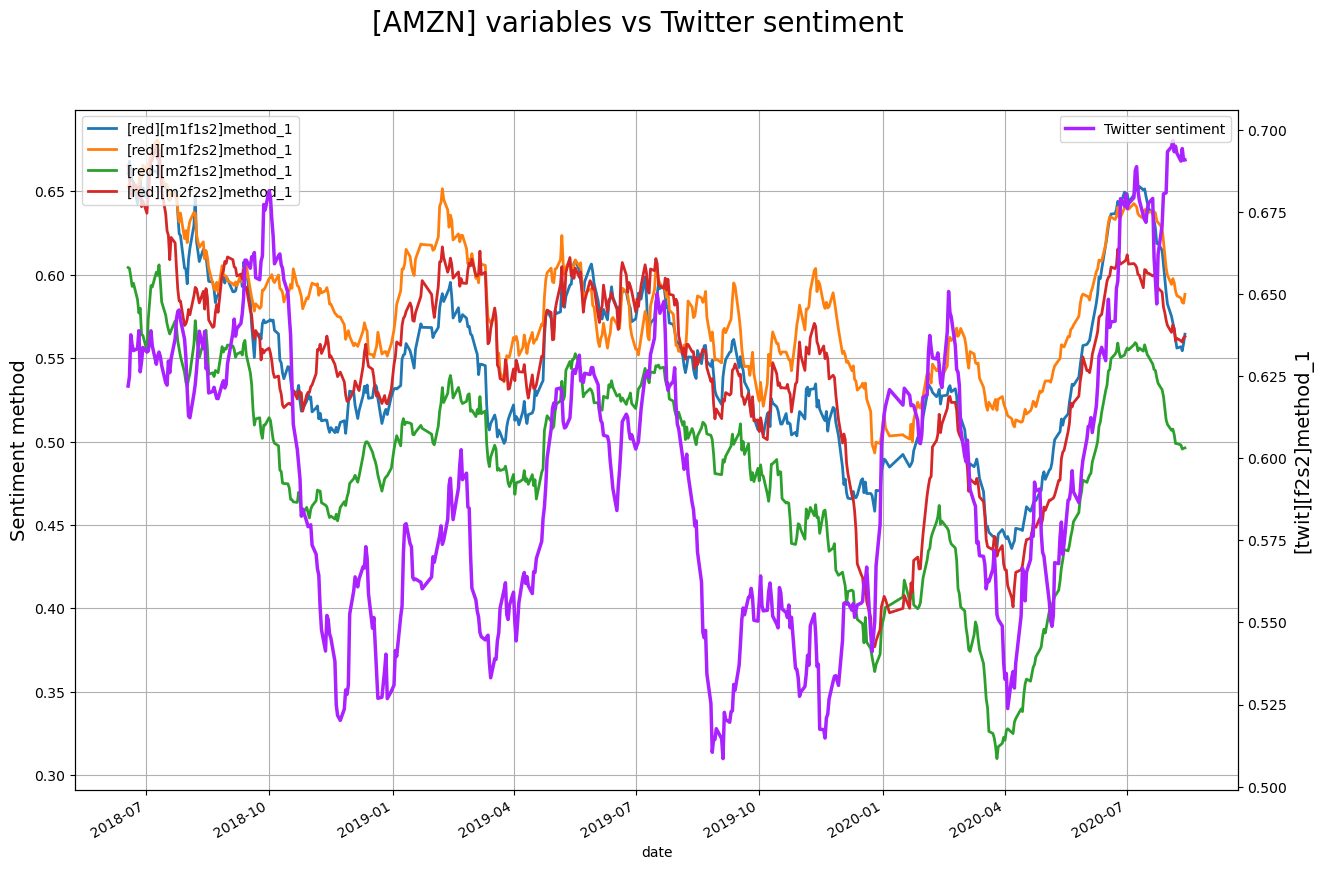

In [25]:
y1 = ['[red][m1f1s2]method_1', 
      '[red][m1f2s2]method_1', 
      '[red][m2f1s2]method_1', 
      '[red][m2f2s2]method_1'
     ]

y2 = '[twit][f2s2]method_1'

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Twitter sentiment", rolling=30, rolling_y2=30, normalize=True, debug=False)


**<u>Twitter</u> sentiment: Volume adjusted (final_sent) vs no volume adjustments (method_1)**


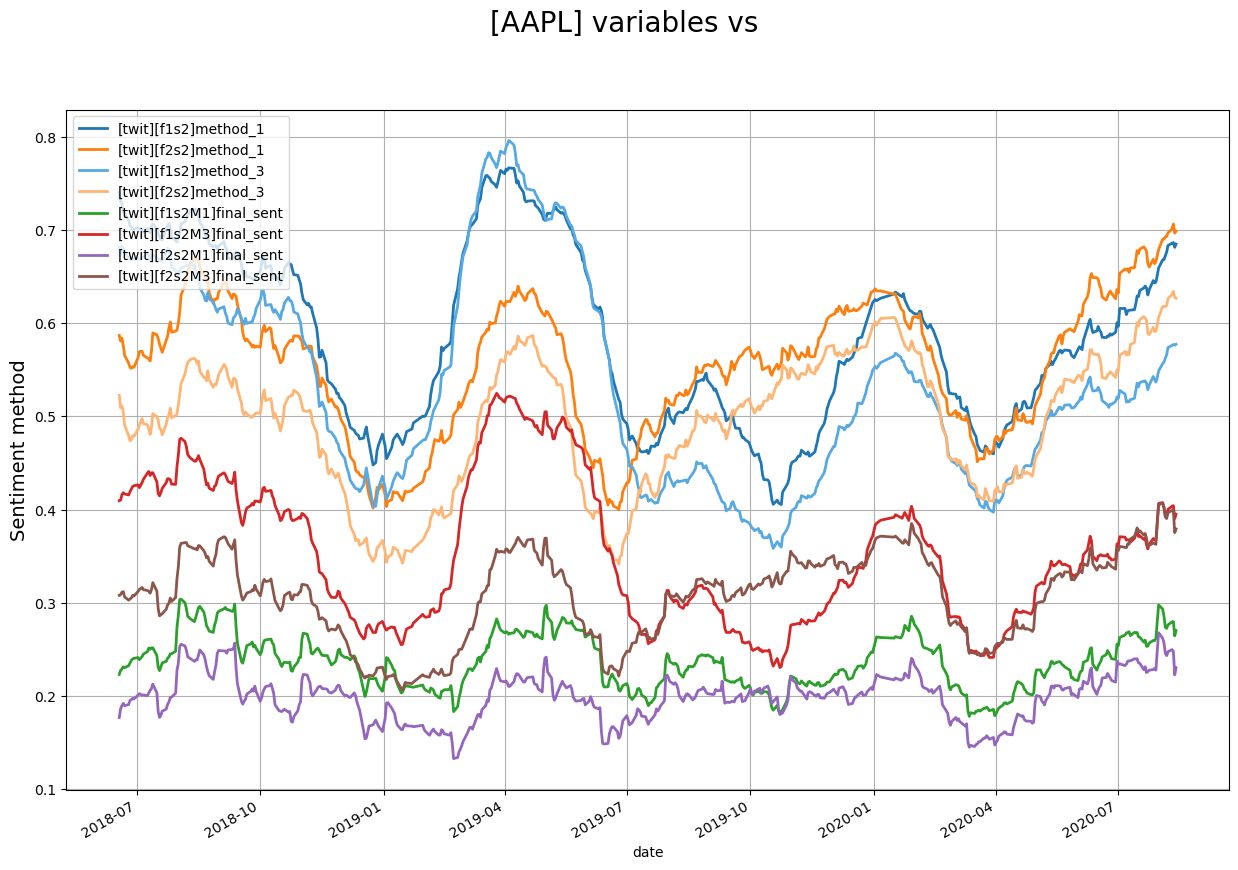

In [200]:
y1 = ['[twit][f1s2]method_1', 
      '[twit][f2s2]method_1', 
      '[twit][f1s2]method_3', 
      '[twit][f2s2]method_3',
      '[twit][f1s2M1]final_sent',
      '[twit][f1s2M3]final_sent',
      '[twit][f2s2M1]final_sent',
      '[twit][f2s2M3]final_sent'
     ]

y2 = '' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="", rolling=30, normalize=True, debug=False)


**With price**

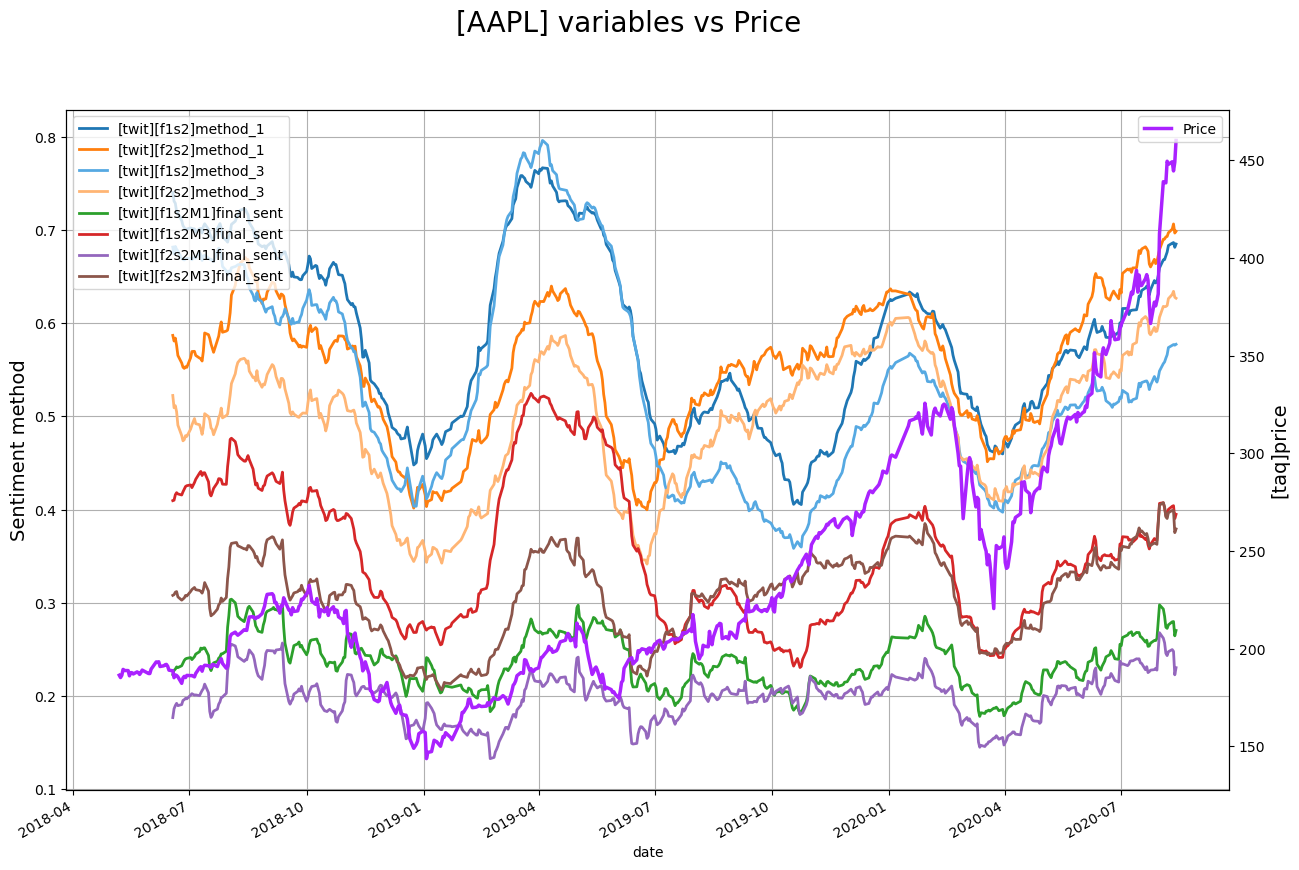

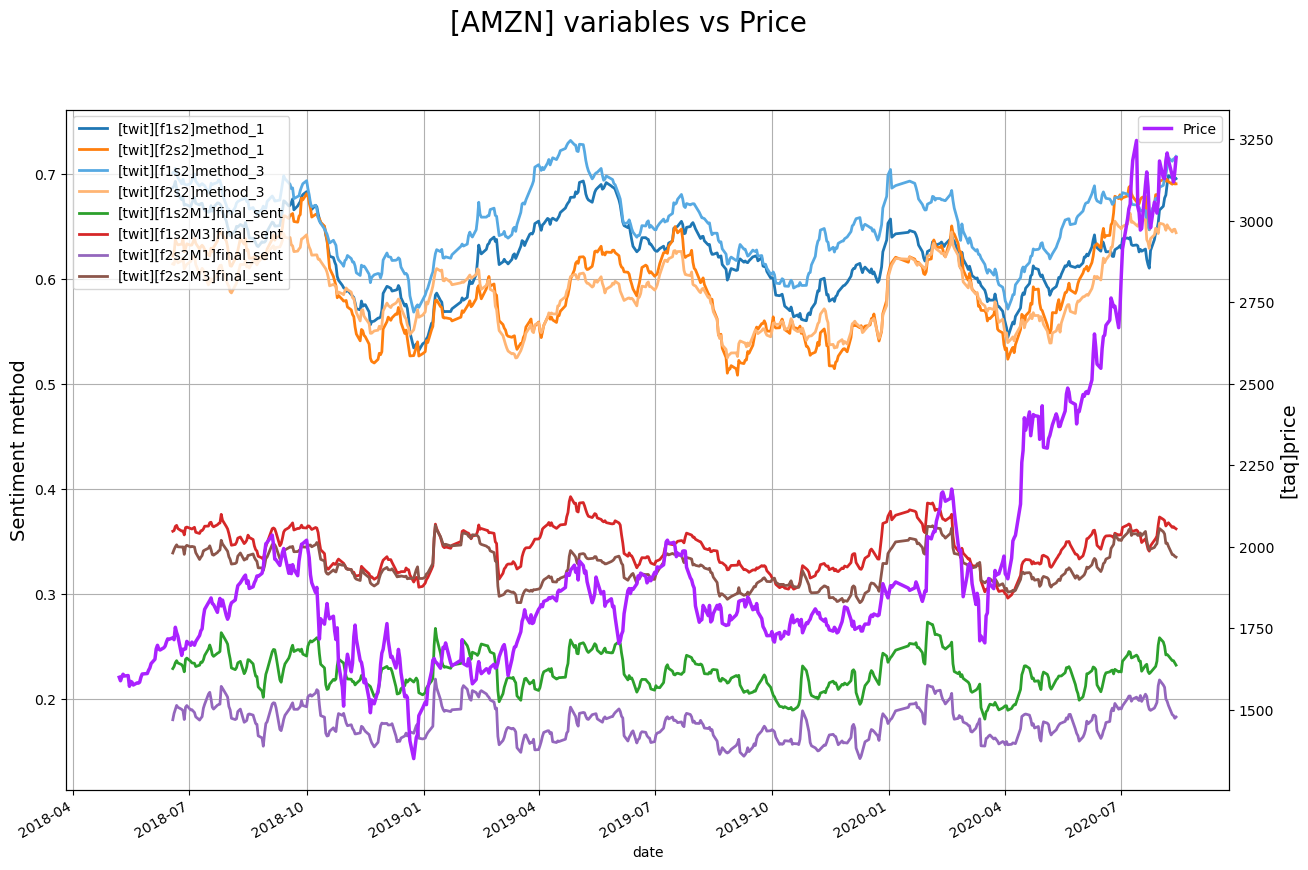

In [29]:
y1 = ['[twit][f1s2]method_1', 
      '[twit][f2s2]method_1', 
      '[twit][f1s2]method_3', 
      '[twit][f2s2]method_3',
      '[twit][f1s2M1]final_sent',
      '[twit][f1s2M3]final_sent',
      '[twit][f2s2M1]final_sent',
      '[twit][f2s2M3]final_sent'
     ]

y2 = '[taq]price' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


**<u>Reddit</u> sentiment: Volume adjusted (final_sent) vs no volume adjustments (method_1)**

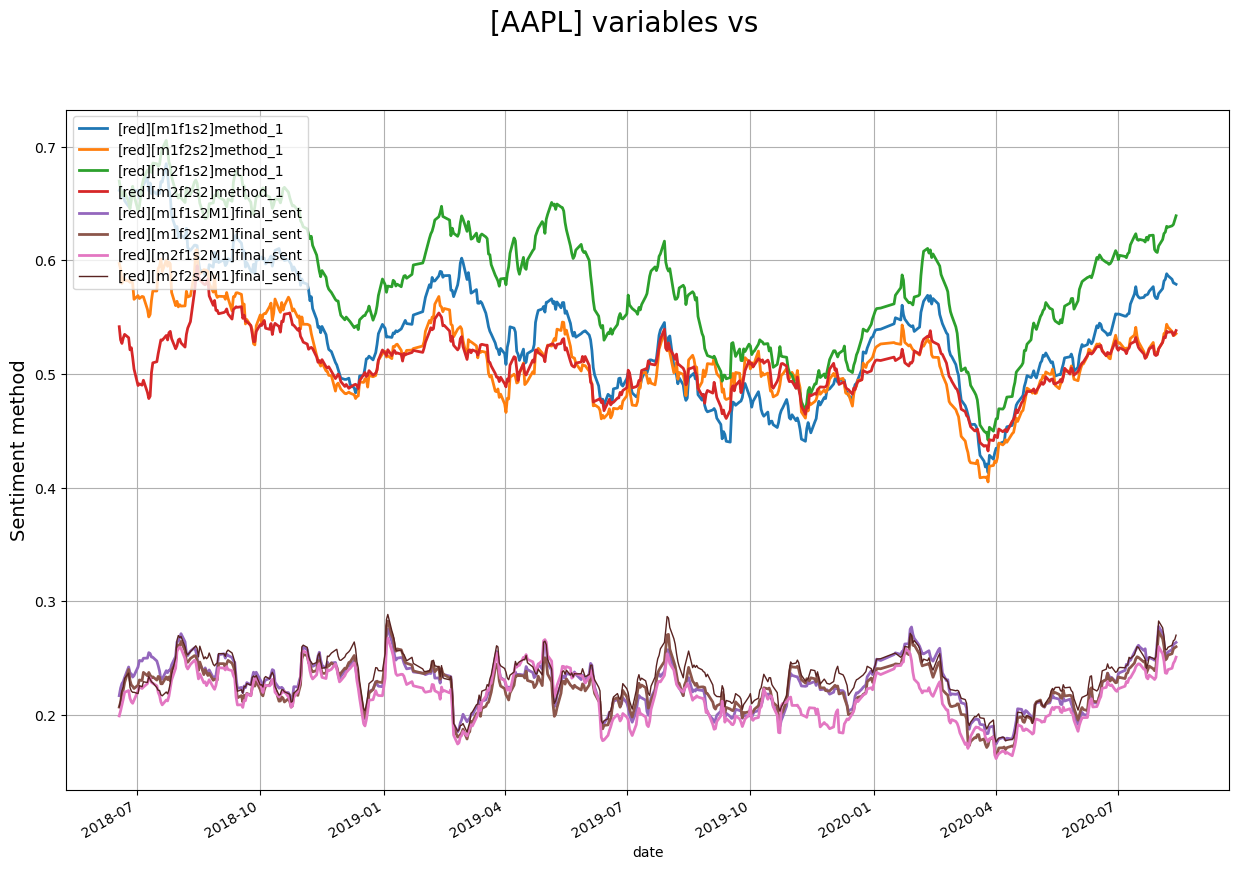

In [188]:
y1 = ['[red][m1f1s2]method_1', 
      '[red][m1f2s2]method_1', 
      '[red][m2f1s2]method_1', 
      '[red][m2f2s2]method_1',
      '[red][m1f1s2M1]final_sent', 
      '[red][m1f2s2M1]final_sent', 
      '[red][m2f1s2M1]final_sent', 
      '[red][m2f2s2M1]final_sent'
     ]

y2 = '' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


**With price**

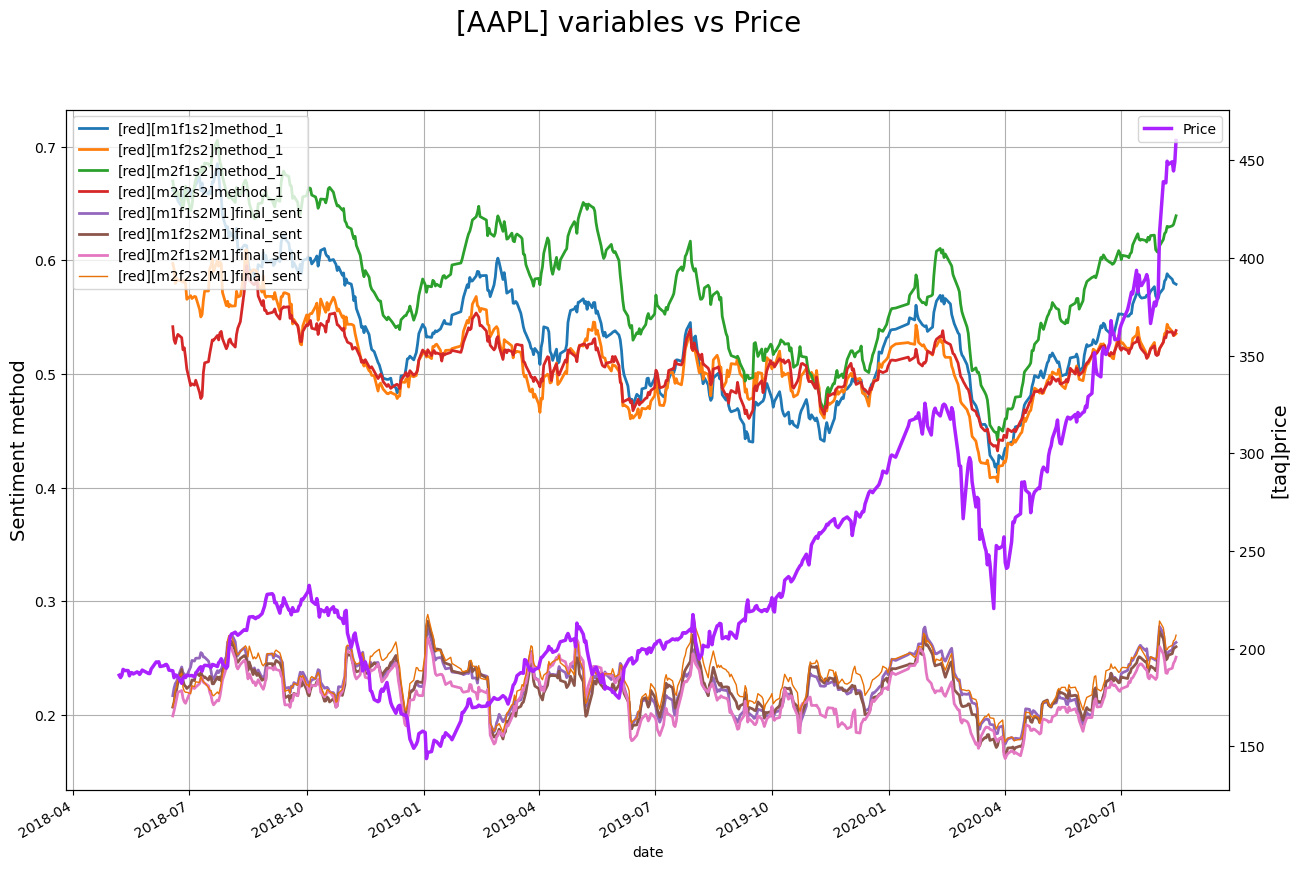

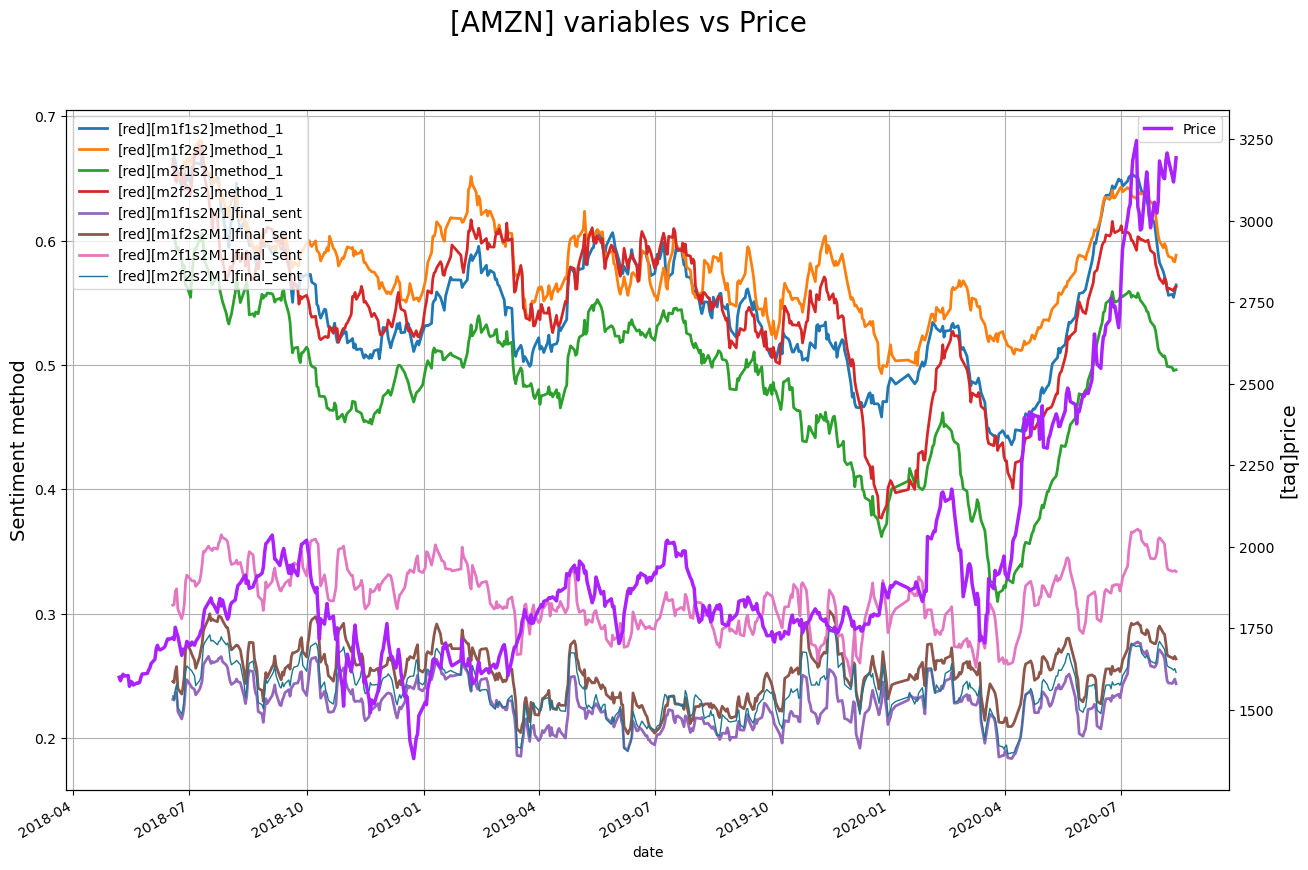

In [28]:
y1 = ['[red][m1f1s2]method_1', 
      '[red][m1f2s2]method_1', 
      '[red][m2f1s2]method_1', 
      '[red][m2f2s2]method_1',
      '[red][m1f1s2M1]final_sent', 
      '[red][m1f2s2M1]final_sent', 
      '[red][m2f1s2M1]final_sent', 
      '[red][m2f2s2M1]final_sent'
     ]

y2 = '[taq]price' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


**With price, total_vol and total_bs**

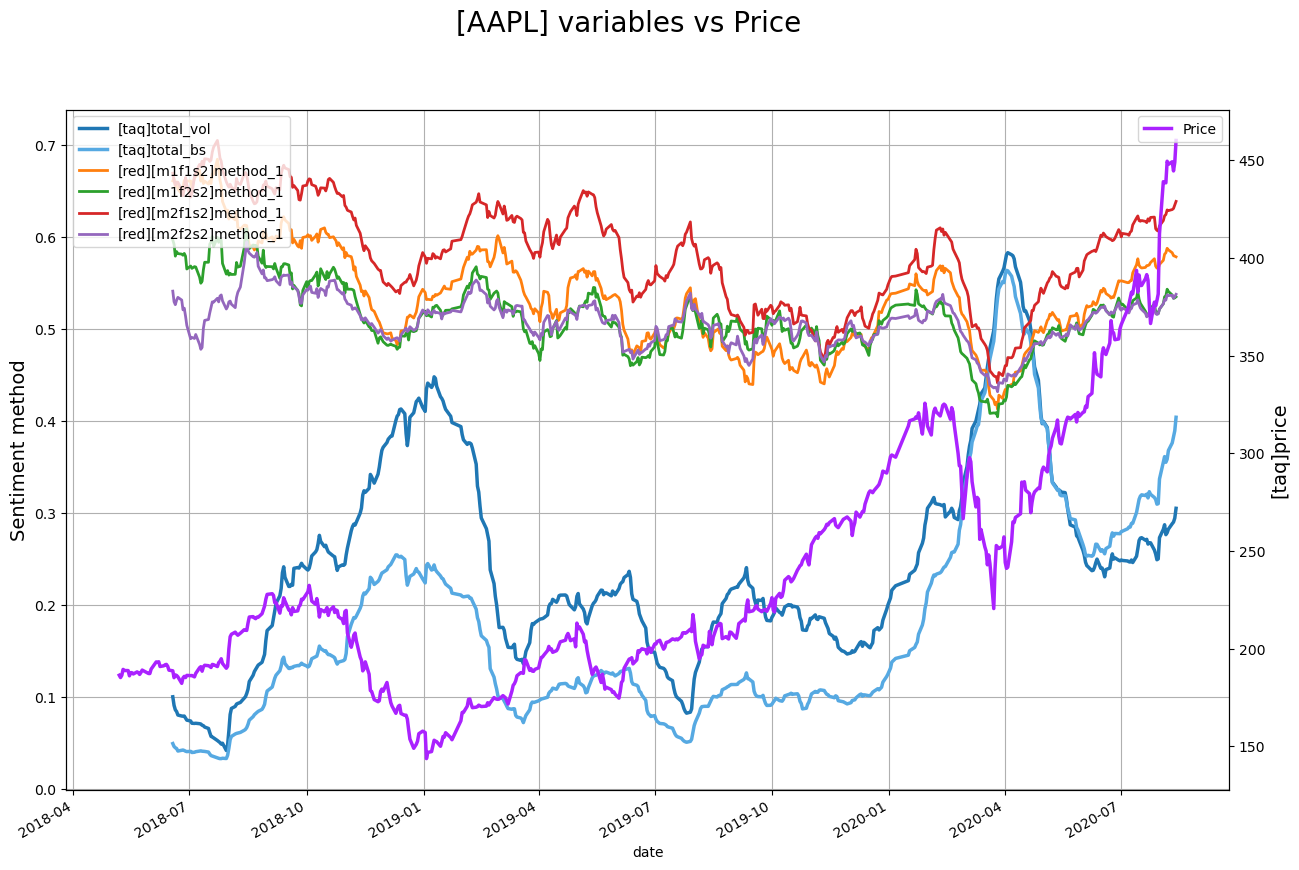

In [204]:
y1 = ['[taq]total_vol',
      '[taq]total_bs',
      '[red][m1f1s2]method_1', 
      '[red][m1f2s2]method_1', 
      '[red][m2f1s2]method_1', 
      '[red][m2f2s2]method_1'
     ]

y2 = '[taq]price' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


### finBERT <a class="anchor" id="sub-bullet4.3"></a>

**finBERT vs VADER**


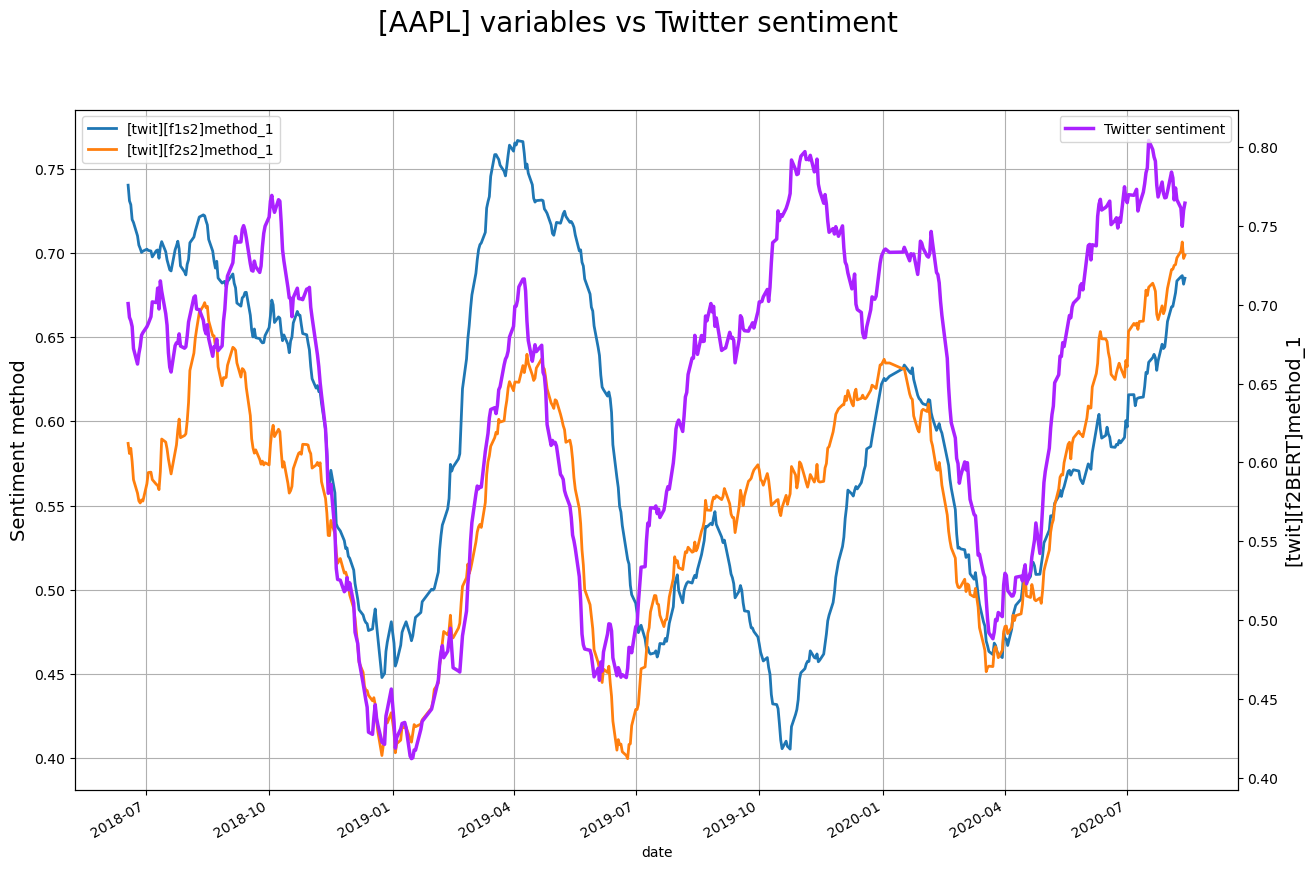

In [206]:
y1 = ['[twit][f1s2]method_1', 
      '[twit][f2s2]method_1'
     ]

y2 = '[twit][f2BERT]method_1'

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Twitter sentiment", rolling=30, rolling_y2=30, normalize=True, debug=False)


**Twitter vs Reddit**

Sentiment Twitter (NOT accounting for volume) ~ Sentiment Reddit (NOT accounting for volume)

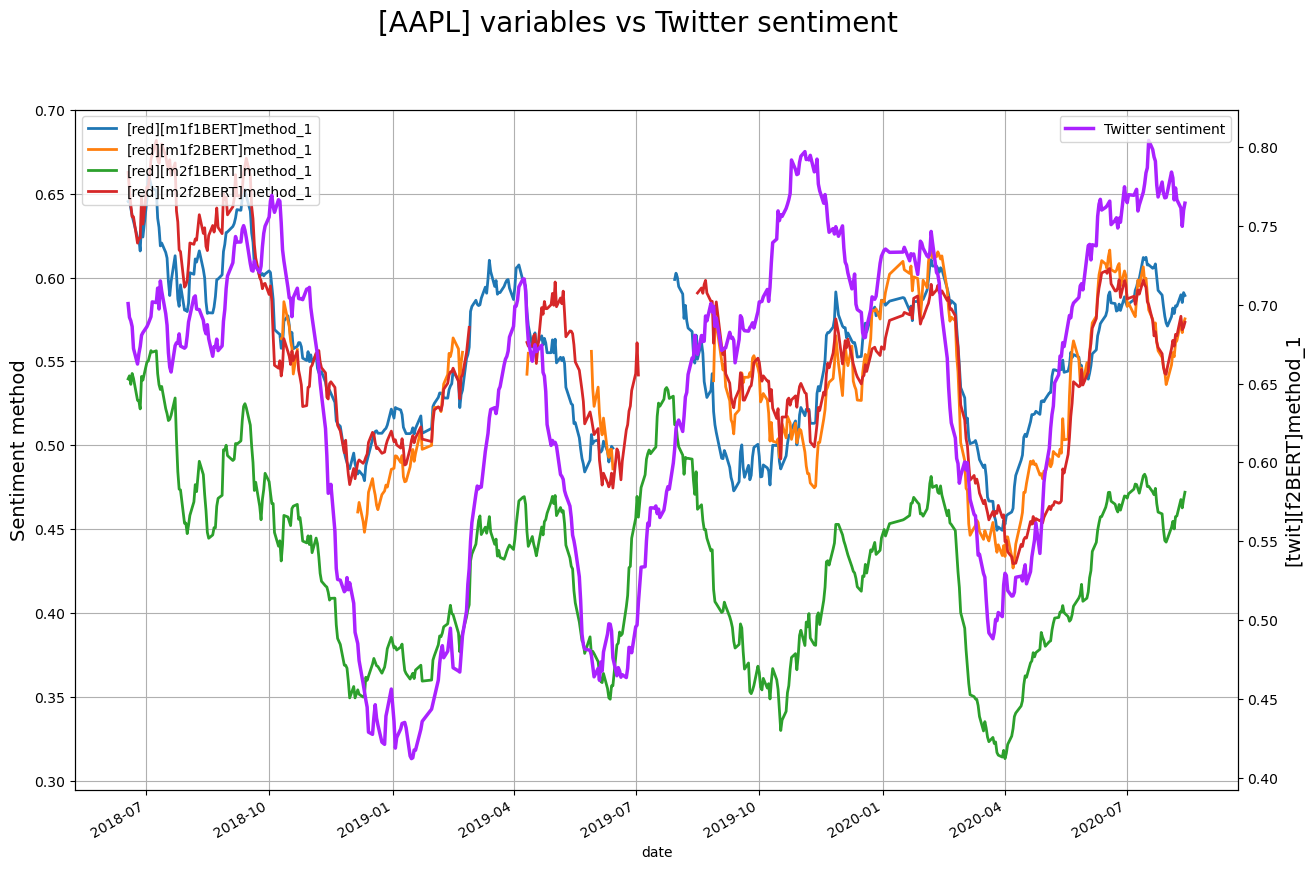

In [207]:
y1 = ['[red][m1f1BERT]method_1', 
      '[red][m1f2BERT]method_1', 
      '[red][m2f1BERT]method_1', 
      '[red][m2f2BERT]method_1'
     ]

y2 = '[twit][f2BERT]method_1'

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Twitter sentiment", rolling=30, rolling_y2=30, normalize=True, debug=False)


**<u>Twitter</u> sentiment: Volume adjusted (final_sent) vs no volume adjustments (method_1)**


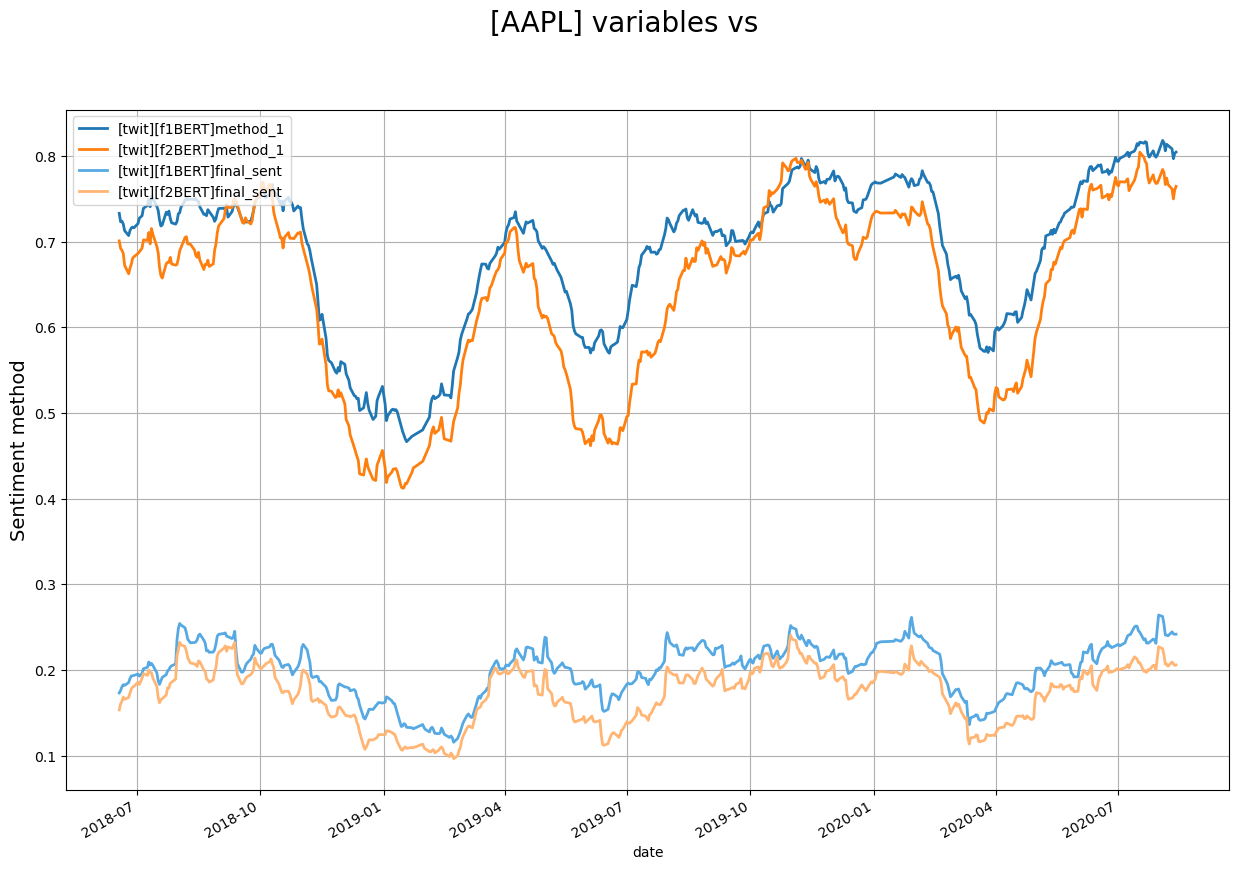

In [209]:
y1 = ['[twit][f1BERT]method_1', 
      '[twit][f2BERT]method_1', 
      '[twit][f1BERT]final_sent',
      '[twit][f2BERT]final_sent'
     ]

y2 = '' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="", rolling=30, normalize=True, debug=False)


**With price**

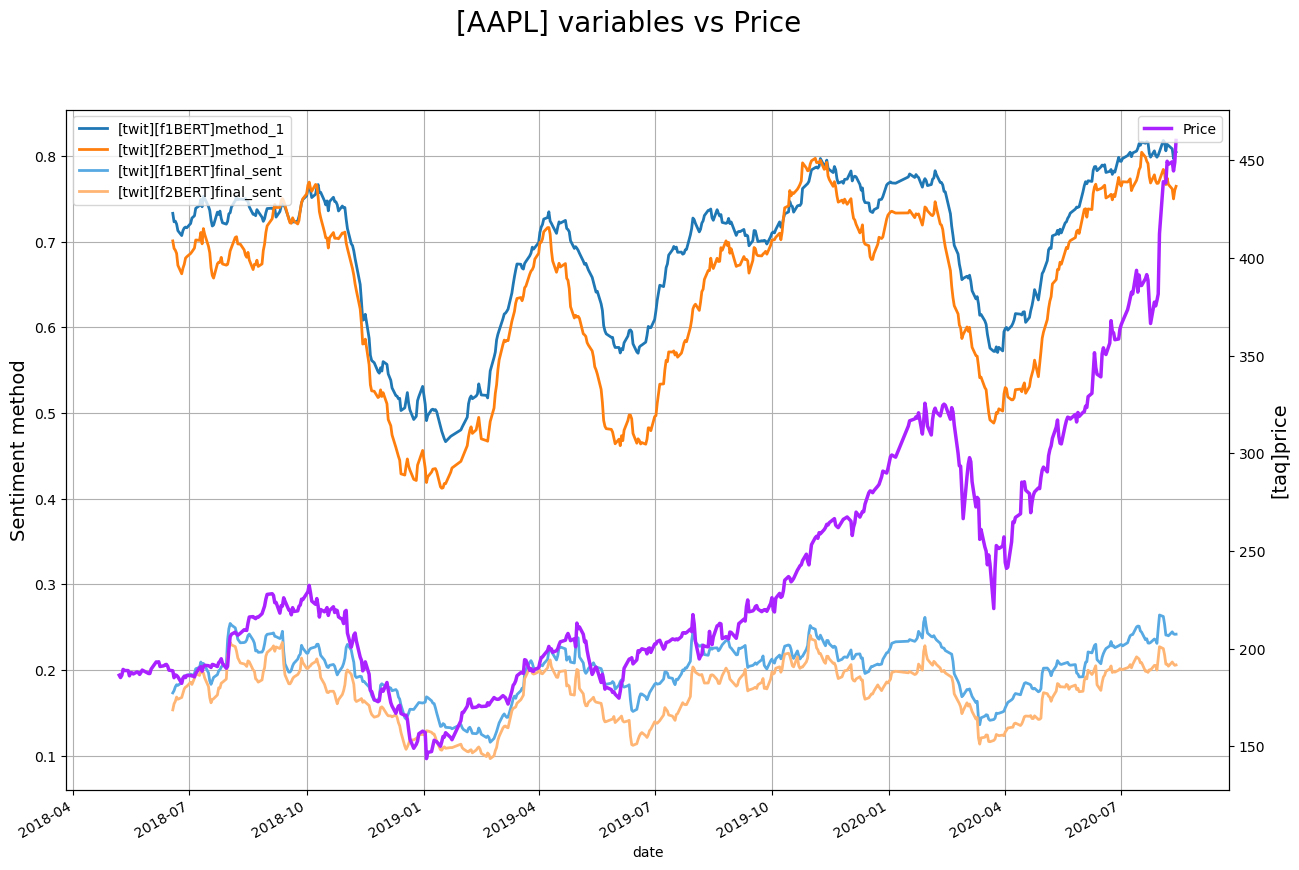

In [210]:
y1 = ['[twit][f1BERT]method_1', 
      '[twit][f2BERT]method_1', 
      '[twit][f1BERT]final_sent',
      '[twit][f2BERT]final_sent'
     ]

y2 = '[taq]price' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


**<u>Reddit</u> sentiment: Volume adjusted (final_sent) vs no volume adjustments (method_1)**

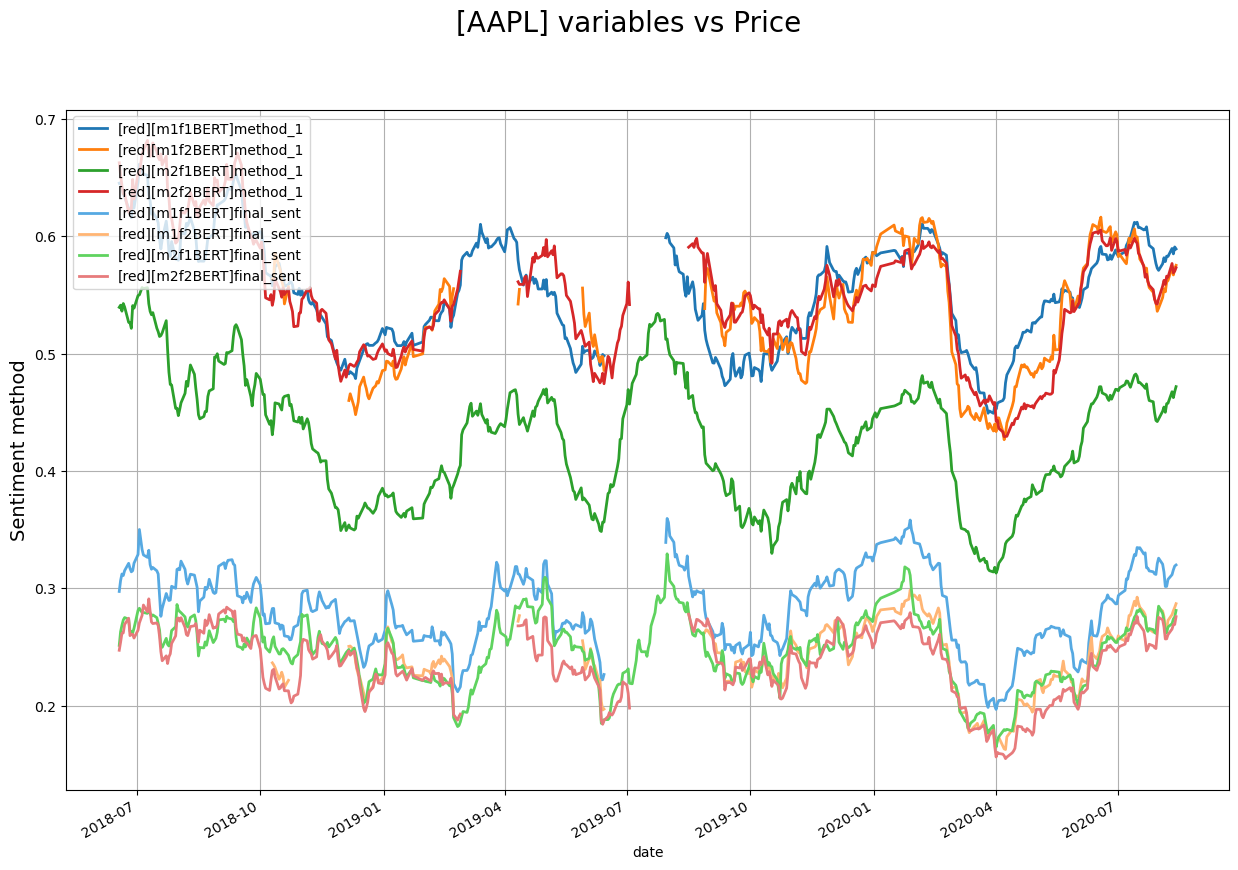

In [211]:
y1 = ['[red][m1f1BERT]method_1', 
      '[red][m1f2BERT]method_1', 
      '[red][m2f1BERT]method_1', 
      '[red][m2f2BERT]method_1',
      '[red][m1f1BERT]final_sent', 
      '[red][m1f2BERT]final_sent', 
      '[red][m2f1BERT]final_sent', 
      '[red][m2f2BERT]final_sent'
     ]

y2 = '' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


**With price**

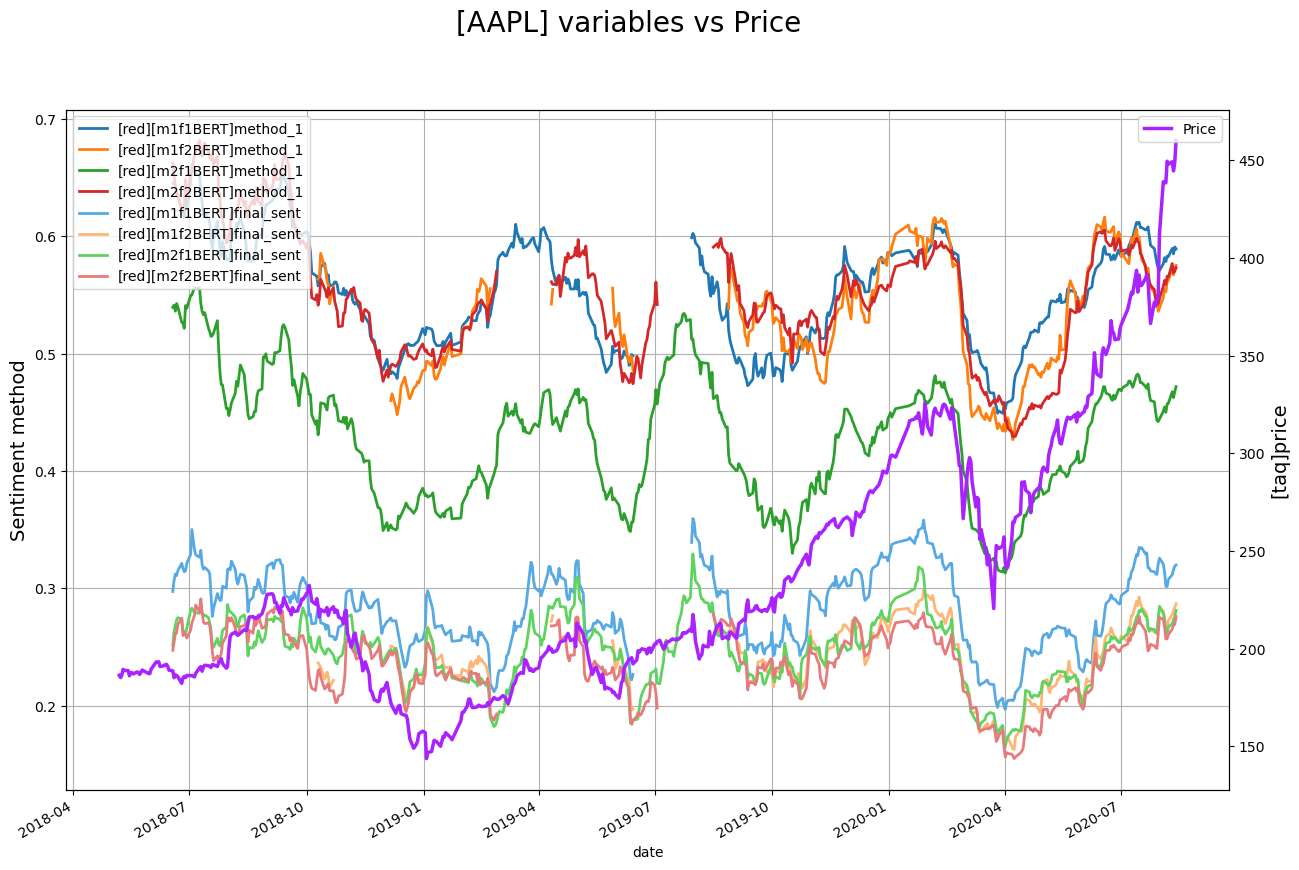

In [212]:
y1 = ['[red][m1f1BERT]method_1', 
      '[red][m1f2BERT]method_1', 
      '[red][m2f1BERT]method_1', 
      '[red][m2f2BERT]method_1',
      '[red][m1f1BERT]final_sent', 
      '[red][m1f2BERT]final_sent', 
      '[red][m2f1BERT]final_sent', 
      '[red][m2f2BERT]final_sent'
     ]

y2 = '[taq]price' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


**With price, total_vol and total_bs**

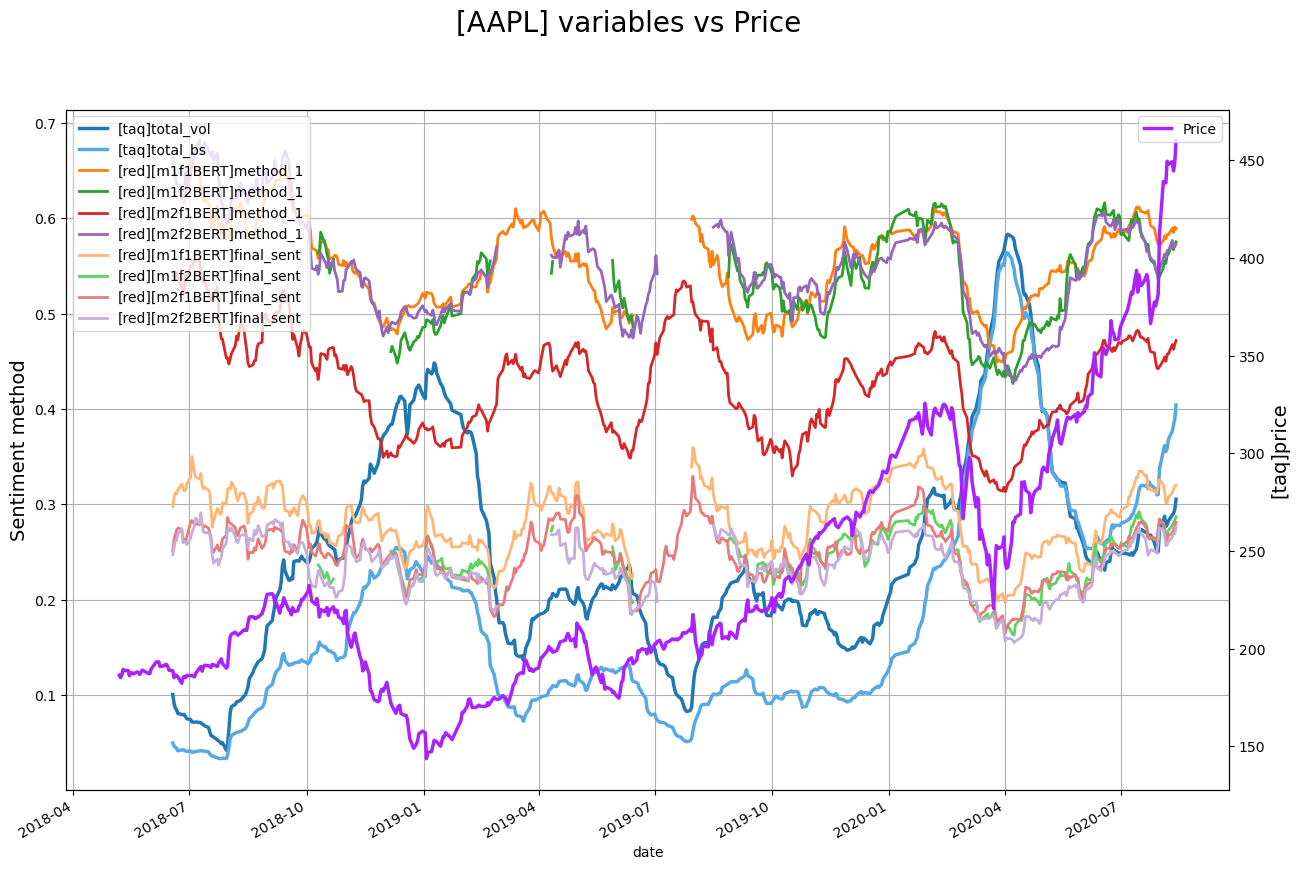

In [213]:
y1 = ['[taq]total_vol',
      '[taq]total_bs',
      '[red][m1f1BERT]method_1', 
      '[red][m1f2BERT]method_1', 
      '[red][m2f1BERT]method_1', 
      '[red][m2f2BERT]method_1',
      '[red][m1f1BERT]final_sent', 
      '[red][m1f2BERT]final_sent', 
      '[red][m2f1BERT]final_sent', 
      '[red][m2f2BERT]final_sent'
     ]

y2 = '[taq]price' 

show_graph(ticker_list, y1=y1, y1_label="Sentiment method", y2=y2, y2_label="Price", rolling=30, normalize=True, debug=False)


## Statistics <a class="anchor" id="bullet5"></a>

### Trading activity measures <a class="anchor" id="sub-bullet5.1"></a>

Comparing the different measures for trading activity, I find the following results. It seems that the Robinhood (noise) trader measures (`[rh]performance_1` and `[rh]performance_2`) corresponds most with the `[taq]bs_change` variable. This is not that unexpected, as none of these measure look into the actual volume of each of the trades. `[rh]performance_1` and `[rh]performance_2` are the most limited, only checking the change in holders of a stock, while `[taq]bs_change` looks at the amount of actual trades.

In [8]:
# AAPL - no rolling period
df = import_csv("AAPL")
df[['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']].rolling(1).mean().corr()

[taq]vol_change  [taq]bs_change  [rh]performance_1  \
[taq]vol_change           1.000000        0.150246           0.024575   
[taq]bs_change            0.150246        1.000000           0.679627   
[rh]performance_1         0.024575        0.679627           1.000000   
[rh]performance_2         0.032101        0.599040           0.897797   

                   [rh]performance_2  
[taq]vol_change             0.032101  
[taq]bs_change              0.599040  
[rh]performance_1           0.897797  
[rh]performance_2           1.000000

In [33]:
# AAPL - 30 day rolling period
df = import_csv("AAPL")
df[['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']].rolling(30).mean().corr()

[taq]vol_change  [taq]bs_change  [rh]performance_1  \
[taq]vol_change           1.000000       -0.011301          -0.184259   
[taq]bs_change           -0.011301        1.000000           0.837805   
[rh]performance_1        -0.184259        0.837805           1.000000   
[rh]performance_2        -0.013585        0.591162           0.731659   

                   [rh]performance_2  
[taq]vol_change            -0.013585  
[taq]bs_change              0.591162  
[rh]performance_1           0.731659  
[rh]performance_2           1.000000

In [32]:
# F - no rolling period
df = import_csv("F")
df[['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']].rolling(1).mean().corr()

[taq]vol_change  [taq]bs_change  [rh]performance_1  \
[taq]vol_change           1.000000        0.501933           0.189340   
[taq]bs_change            0.501933        1.000000           0.544291   
[rh]performance_1         0.189340        0.544291           1.000000   
[rh]performance_2         0.181690        0.411159           0.808555   

                   [rh]performance_2  
[taq]vol_change             0.181690  
[taq]bs_change              0.411159  
[rh]performance_1           0.808555  
[rh]performance_2           1.000000

In [34]:
# F - 30 day rolling period
df = import_csv("F")
df[['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']].rolling(30).mean().corr()

[taq]vol_change  [taq]bs_change  [rh]performance_1  \
[taq]vol_change           1.000000        0.611553           0.404150   
[taq]bs_change            0.611553        1.000000           0.734168   
[rh]performance_1         0.404150        0.734168           1.000000   
[rh]performance_2         0.417617        0.476062           0.725476   

                   [rh]performance_2  
[taq]vol_change             0.417617  
[taq]bs_change              0.476062  
[rh]performance_1           0.725476  
[rh]performance_2           1.000000

In [31]:
# AMZN - no rolling period
df = import_csv("AMZN")
df[['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']].rolling(1).mean().corr()

[taq]vol_change  [taq]bs_change  [rh]performance_1  \
[taq]vol_change           1.000000        0.296243           0.154180   
[taq]bs_change            0.296243        1.000000           0.522774   
[rh]performance_1         0.154180        0.522774           1.000000   
[rh]performance_2         0.123438        0.459146           0.940213   

                   [rh]performance_2  
[taq]vol_change             0.123438  
[taq]bs_change              0.459146  
[rh]performance_1           0.940213  
[rh]performance_2           1.000000

In [92]:
# AMZN - 30 day rolling period
df = import_csv("AMZN")
df[['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']].rolling(30).mean().corr()


[taq]vol_change  [taq]bs_change  [rh]performance_1  \
[taq]vol_change           1.000000        0.474295           0.235100   
[taq]bs_change            0.474295        1.000000           0.573637   
[rh]performance_1         0.235100        0.573637           1.000000   
[rh]performance_2         0.163901        0.509331           0.922413   

                   [rh]performance_2  
[taq]vol_change             0.163901  
[taq]bs_change              0.509331  
[rh]performance_1           0.922413  
[rh]performance_2           1.000000

### Sentiment measures <a class="anchor" id="sub-bullet5.2"></a>



In [9]:
# Function to graph correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_corr_matrix(corr_matrix, diagram=True, font_size = 12, width=12):

    
    # Remove half of the observations to create diagram
    if diagram:
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    else:
        mask = False
    # Create a larger figure with more space for the heatmap
    fig, ax = plt.subplots(figsize=(15, width))

    # Create a heatmap with color-coded values and larger annotations
    sns.heatmap(corr_matrix, mask=mask, cmap='Spectral', annot=True, vmin=-1, vmax=1,
                square=True, fmt='.2f', linewidths=.5, cbar_kws={"shrink": .5},
                annot_kws={"size": font_size, "style": "italic"}, ax=ax)

    plt.title('Correlation Matrix', fontsize=20)
    plt.show()


**Twitter**

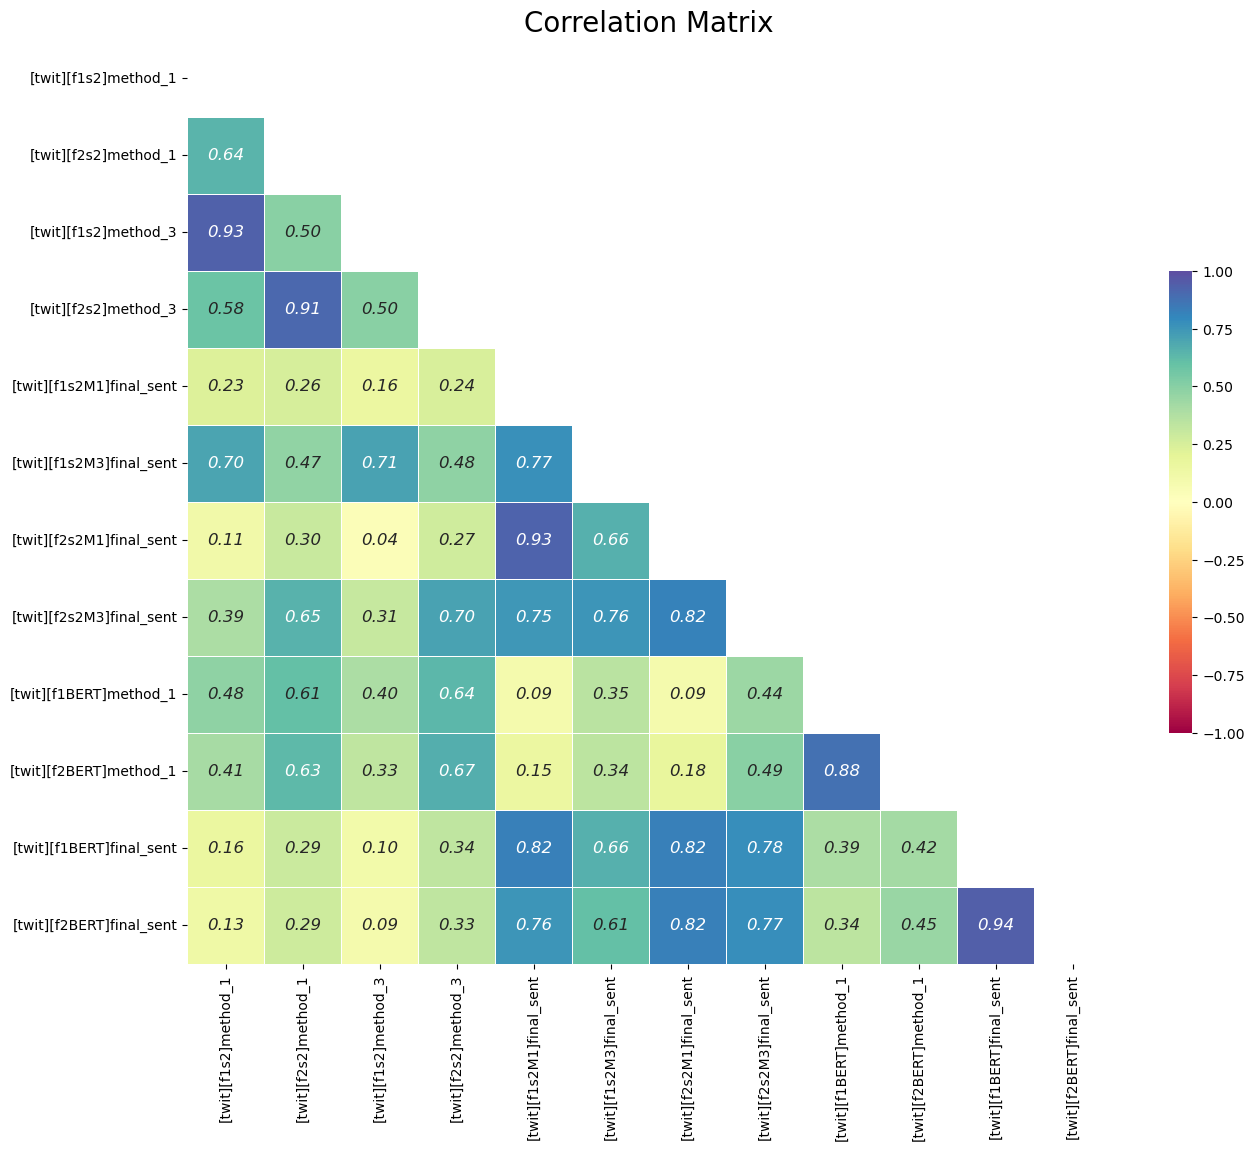

In [46]:
# Twitter column list
col_list_twit = ['[twit][f1s2]method_1', '[twit][f2s2]method_1', '[twit][f1s2]method_3', '[twit][f2s2]method_3',
                 '[twit][f1s2M1]final_sent', '[twit][f1s2M3]final_sent', '[twit][f2s2M1]final_sent',
                 '[twit][f2s2M3]final_sent', '[twit][f1BERT]method_1', '[twit][f2BERT]method_1',
                 '[twit][f1BERT]final_sent', '[twit][f2BERT]final_sent']

# Correlation matrix for Twitter sentiment variables
df = import_csv("AAPL")
corr_matrix = df[col_list_twit].corr()
plot_corr_matrix(corr_matrix)

**Reddit**

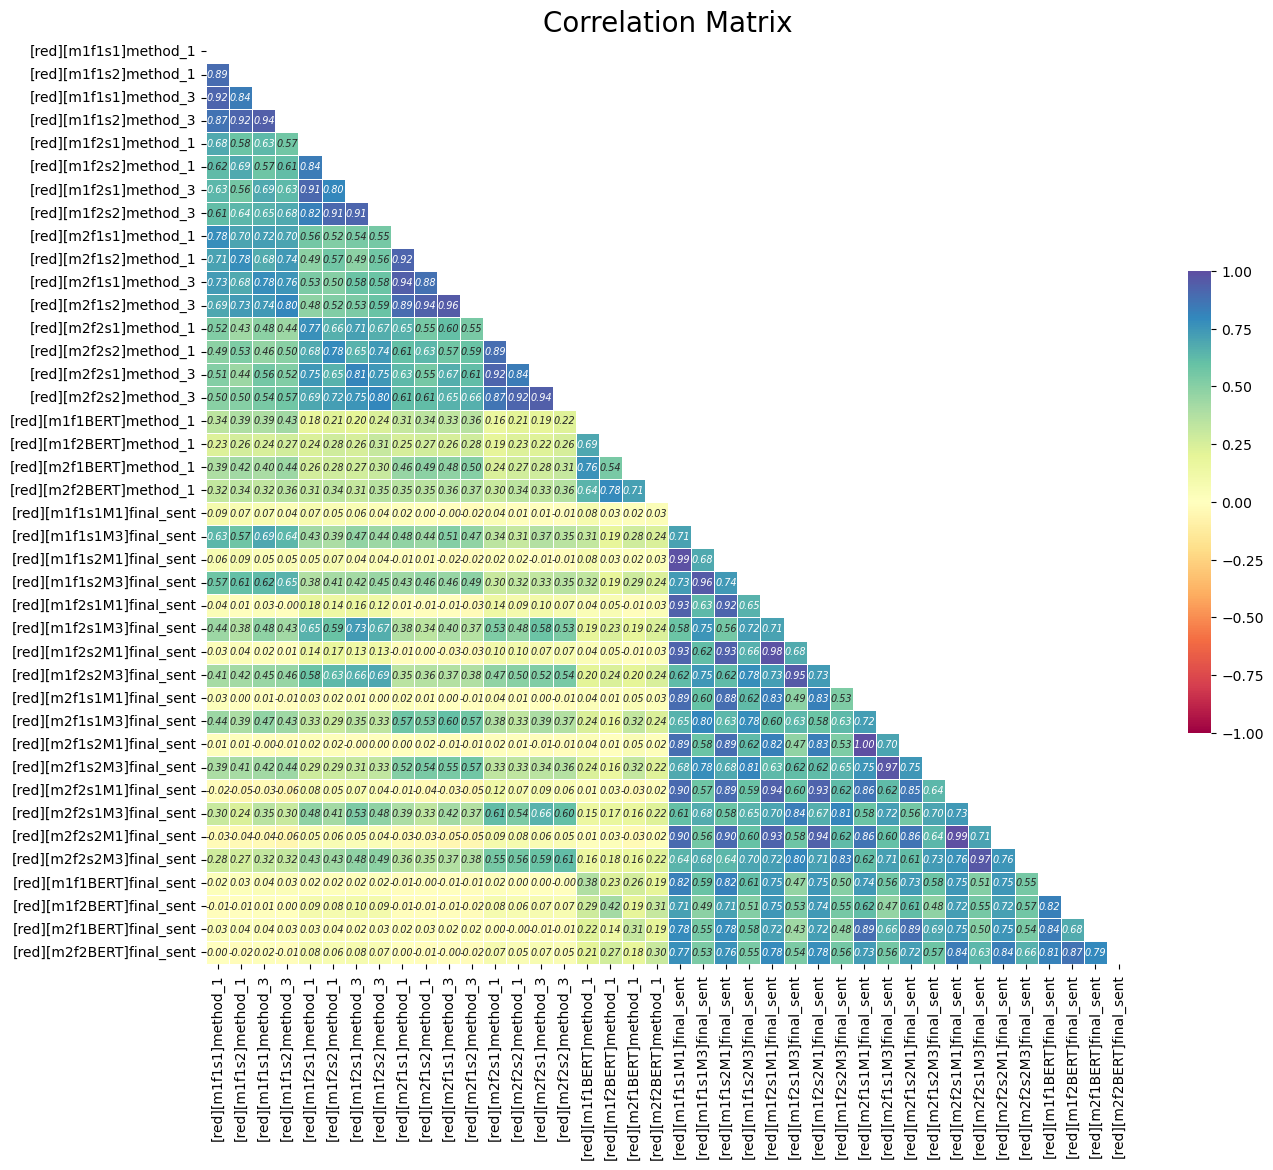

In [47]:
# Reddit column list

col_list_red = ['[red][m1f1s1]method_1', '[red][m1f1s2]method_1', '[red][m1f1s1]method_3', '[red][m1f1s2]method_3',
                '[red][m1f2s1]method_1', '[red][m1f2s2]method_1', '[red][m1f2s1]method_3', '[red][m1f2s2]method_3',
                '[red][m2f1s1]method_1', '[red][m2f1s2]method_1', '[red][m2f1s1]method_3', '[red][m2f1s2]method_3',
                '[red][m2f2s1]method_1', '[red][m2f2s2]method_1', '[red][m2f2s1]method_3', '[red][m2f2s2]method_3',
                '[red][m1f1BERT]method_1', '[red][m1f2BERT]method_1', '[red][m2f1BERT]method_1', '[red][m2f2BERT]method_1',
                '[red][m1f1s1M1]final_sent', '[red][m1f1s1M3]final_sent', '[red][m1f1s2M1]final_sent', '[red][m1f1s2M3]final_sent',
                '[red][m1f2s1M1]final_sent', '[red][m1f2s1M3]final_sent', '[red][m1f2s2M1]final_sent', '[red][m1f2s2M3]final_sent',
                '[red][m2f1s1M1]final_sent', '[red][m2f1s1M3]final_sent', '[red][m2f1s2M1]final_sent', '[red][m2f1s2M3]final_sent',
                '[red][m2f2s1M1]final_sent', '[red][m2f2s1M3]final_sent', '[red][m2f2s2M1]final_sent', '[red][m2f2s2M3]final_sent',
                '[red][m1f1BERT]final_sent', '[red][m1f2BERT]final_sent', '[red][m2f1BERT]final_sent', '[red][m2f2BERT]final_sent']
# Correlation matrix for Reddit sentiment variables
df = import_csv("AAPL")
corr_matrix = df[col_list_red].corr()
plot_corr_matrix(corr_matrix, font_size=7)

### Sentiment and trading activity <a class="anchor" id="sub-bullet5.3"></a>



**Twitter**

In [110]:
# 'rolling' = number of days over which sentiment measure is averaged
# 'lag' = number of days sentiment measure is lagged. A 1 day lag is created by df.shift(-1)

def sentiment_twitter_corr(ticker, rolling=1, lag=0):   
    # Twitter column list
    dependent_var_list = ['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']
    twit_col_list = ['[twit][f1s2]method_1', '[twit][f2s2]method_1', '[twit][f1s2]method_3', '[twit][f2s2]method_3',
                     '[twit][f1s2M1]final_sent', '[twit][f1s2M3]final_sent', '[twit][f2s2M1]final_sent',
                     '[twit][f2s2M3]final_sent', '[twit][f1BERT]method_1', '[twit][f2BERT]method_1',
                     '[twit][f1BERT]final_sent', '[twit][f2BERT]final_sent']
    col_list = dependent_var_list + twit_col_list
    
    # Read csv
    df = import_csv(ticker)
    
    # Calculate rolling mean
    df.loc[:,twit_col_list] = df.loc[:,twit_col_list].shift(-lag).rolling(rolling).mean()
    df = df.dropna().reset_index(drop=True)
    
    # Creating lag
    
    
    
    # Correlation matrix for Twitter sentiment variables
   
    corr_matrix = df[col_list].corr()
    corr_matrix = corr_matrix.loc[dependent_var_list]
    # corr_matrix = corr_matrix[['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2',]]
    plot_corr_matrix(corr_matrix.iloc[:,4:], diagram=False)


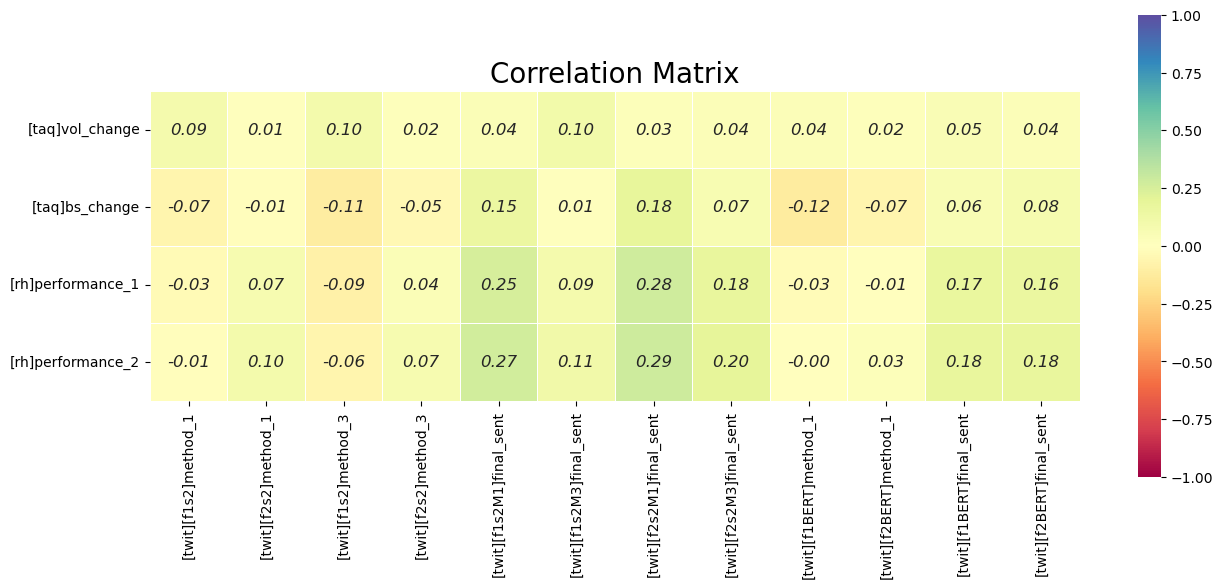

In [114]:
sentiment_twitter_corr("AAPL", rolling=1, lag=0)

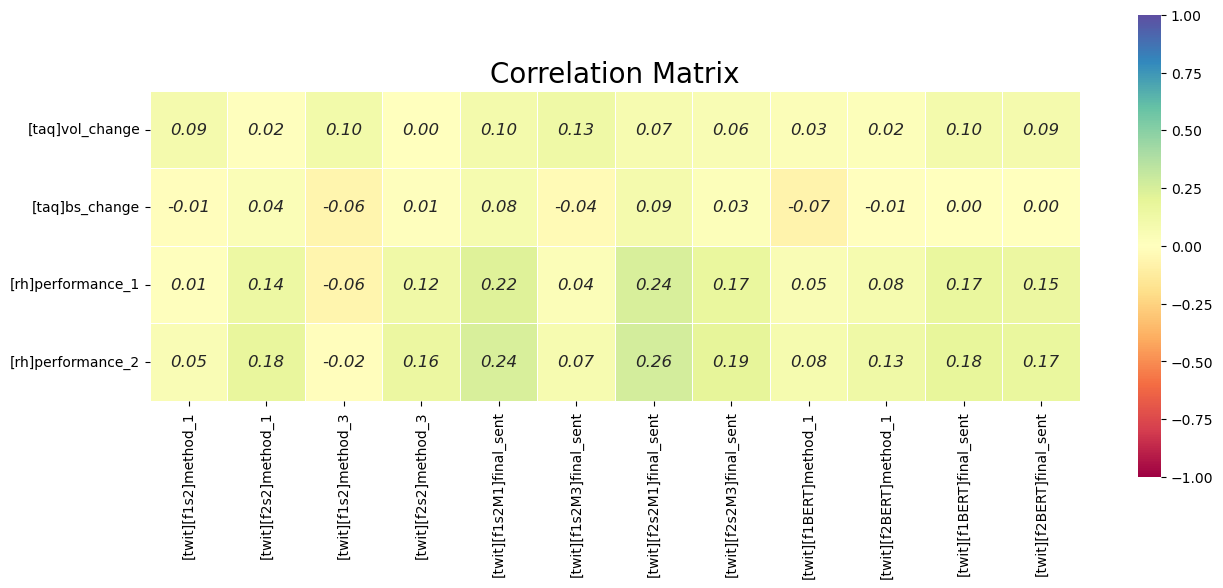

In [123]:
sentiment_twitter_corr("AAPL", rolling=7, lag=0)

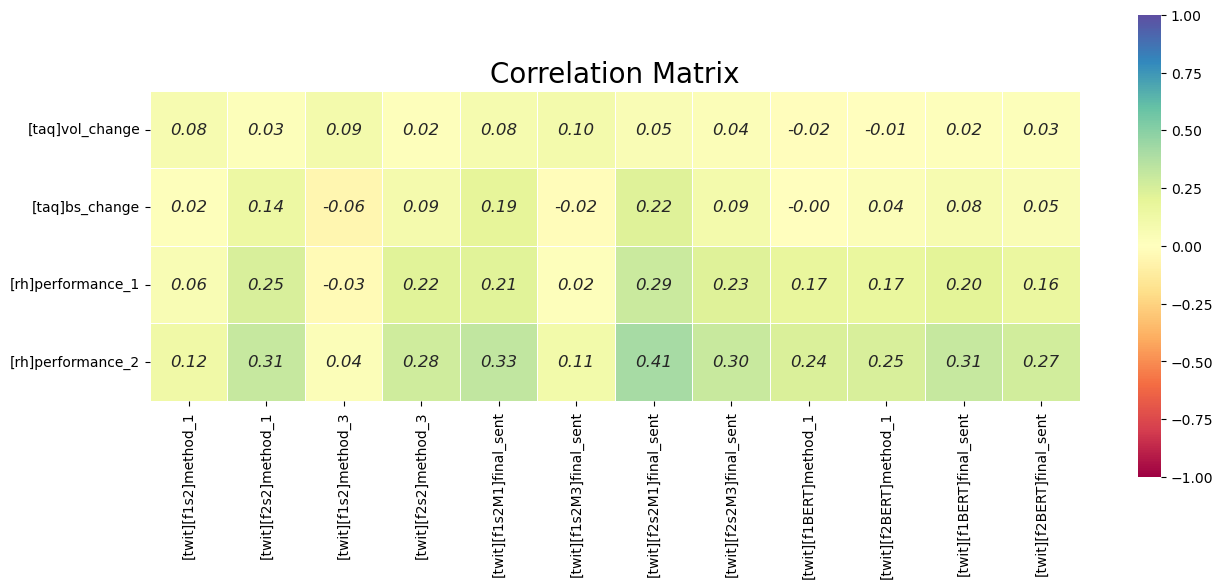

In [126]:
sentiment_twitter_corr("AAPL", rolling=30, lag=0)

**Reddit**

In [19]:
# 'rolling' = number of days over which sentiment measure is averaged
# 'lag' = number of days sentiment measure is lagged. A 1 day lag is created by df.shift(-1)

def sentiment_reddit_corr(ticker, rolling=1, lag=0):   
    # Twitter column list
    dependent_var_list = ['[taq]vol_change', '[taq]bs_change', '[rh]performance_1', '[rh]performance_2']
    col_list_red1 = ['[red][m1f1s1]method_1', '[red][m1f1s2]method_1', '[red][m1f1s1]method_3', '[red][m1f1s2]method_3',
                '[red][m1f2s1]method_1', '[red][m1f2s2]method_1', '[red][m1f2s1]method_3', '[red][m1f2s2]method_3',
                '[red][m2f1s1]method_1', '[red][m2f1s2]method_1', '[red][m2f1s1]method_3', '[red][m2f1s2]method_3',
                '[red][m2f2s1]method_1', '[red][m2f2s2]method_1', '[red][m2f2s1]method_3', '[red][m2f2s2]method_3',
                '[red][m1f1BERT]method_1', '[red][m1f2BERT]method_1', '[red][m2f1BERT]method_1', '[red][m2f2BERT]method_1']
    col_list_red2 = ['[red][m1f1s1M1]final_sent', '[red][m1f1s1M3]final_sent', '[red][m1f1s2M1]final_sent', '[red][m1f1s2M3]final_sent',
                '[red][m1f2s1M1]final_sent', '[red][m1f2s1M3]final_sent', '[red][m1f2s2M1]final_sent', '[red][m1f2s2M3]final_sent',
                '[red][m2f1s1M1]final_sent', '[red][m2f1s1M3]final_sent', '[red][m2f1s2M1]final_sent', '[red][m2f1s2M3]final_sent',
                '[red][m2f2s1M1]final_sent', '[red][m2f2s1M3]final_sent', '[red][m2f2s2M1]final_sent', '[red][m2f2s2M3]final_sent',
                '[red][m1f1BERT]final_sent', '[red][m1f2BERT]final_sent', '[red][m2f1BERT]final_sent', '[red][m2f2BERT]final_sent']
    col_list1 = dependent_var_list + col_list_red1
    col_list2 = dependent_var_list + col_list_red2
    col_list_red = col_list_red1 + col_list_red2
    # Read csv
    df = import_csv(ticker)
    
    # Calculate rolling mean
    df.loc[:,col_list_red] = df.loc[:,col_list_red].shift(-lag).rolling(rolling).mean()
    df = df.dropna().reset_index(drop=True)
    
    # Correlation matrix for Twitter sentiment variables
    corr_matrix1 = df[col_list1].corr()
    corr_matrix1 = corr_matrix1.loc[dependent_var_list]
    plot_corr_matrix(corr_matrix1.iloc[:,4:], diagram=False, font_size=7, width=12)
    
    # Correlation matrix for Twitter sentiment variables
    corr_matrix2 = df[col_list2].corr()
    corr_matrix2 = corr_matrix2.loc[dependent_var_list]
    plot_corr_matrix(corr_matrix2.iloc[:,4:], diagram=False, font_size=7, width=12)


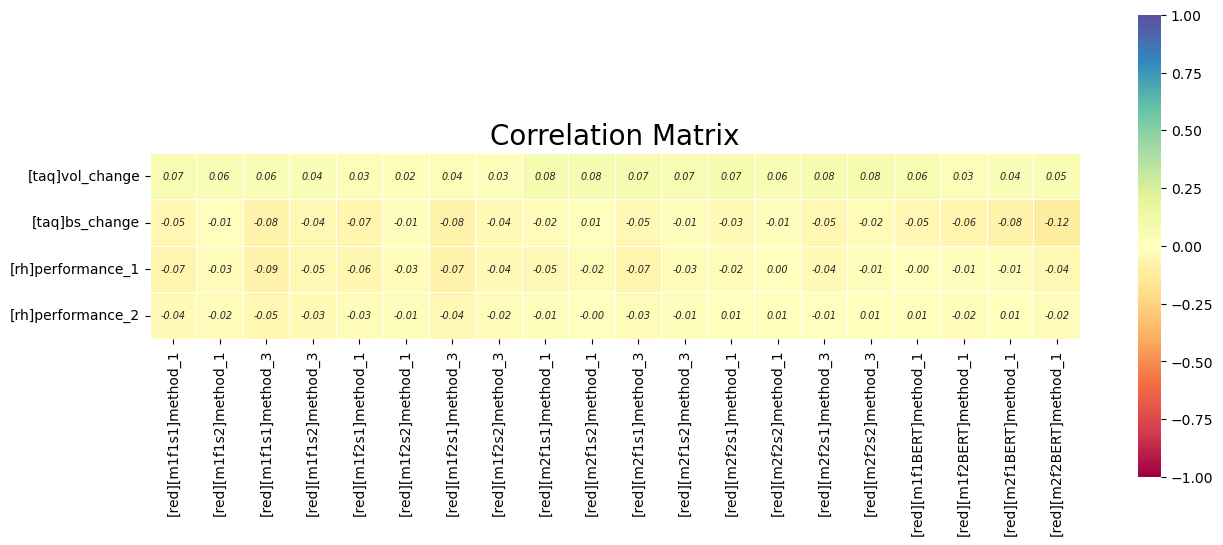

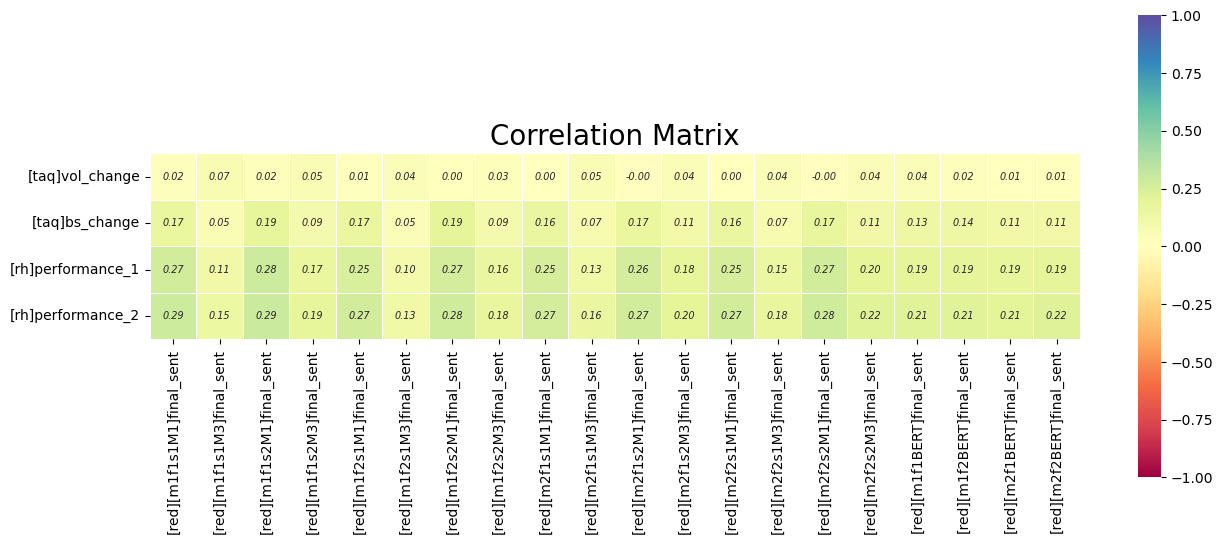

In [20]:
sentiment_reddit_corr("AAPL", rolling=1, lag=0)

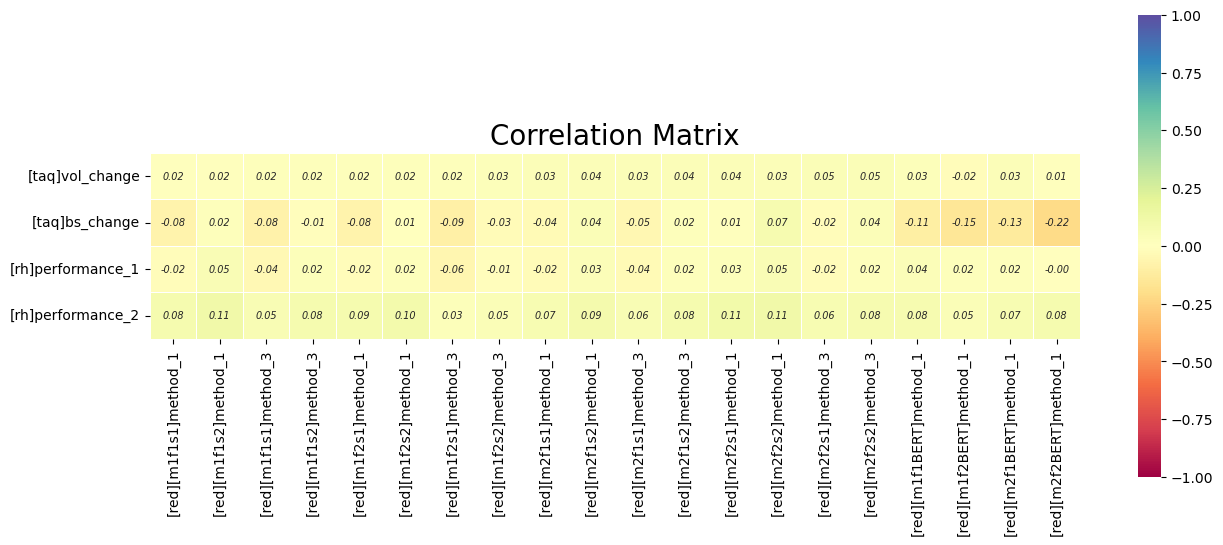

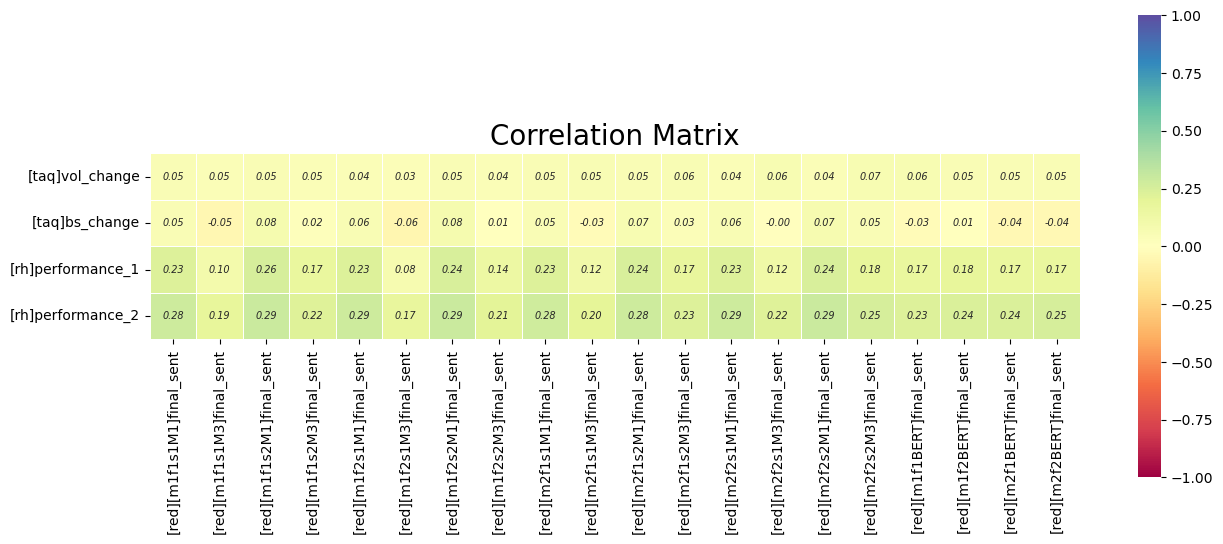

In [21]:
sentiment_reddit_corr("AAPL", rolling=7, lag=0)

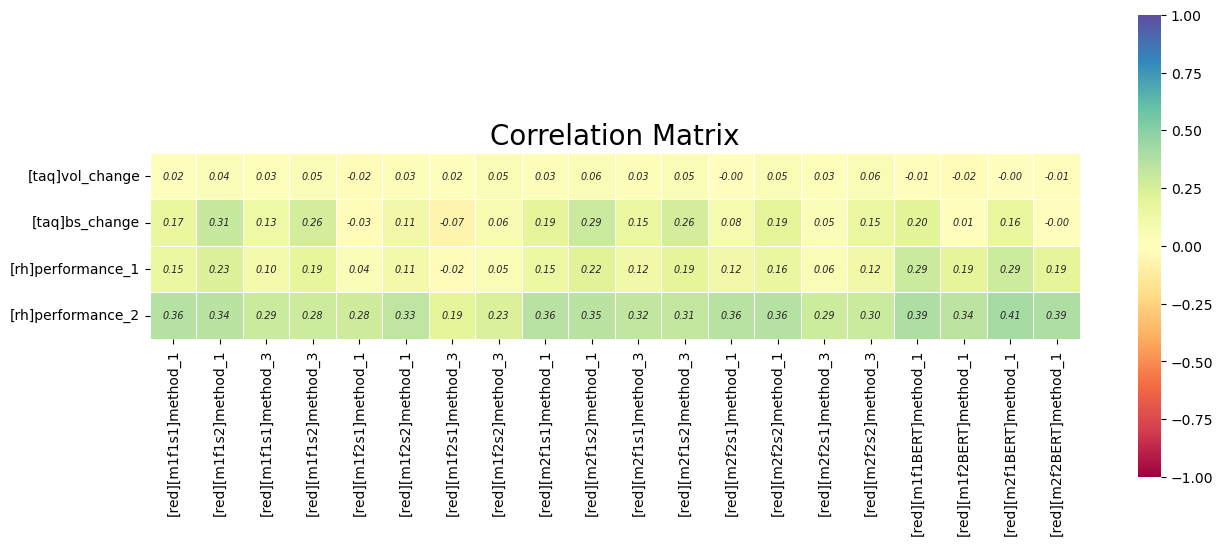

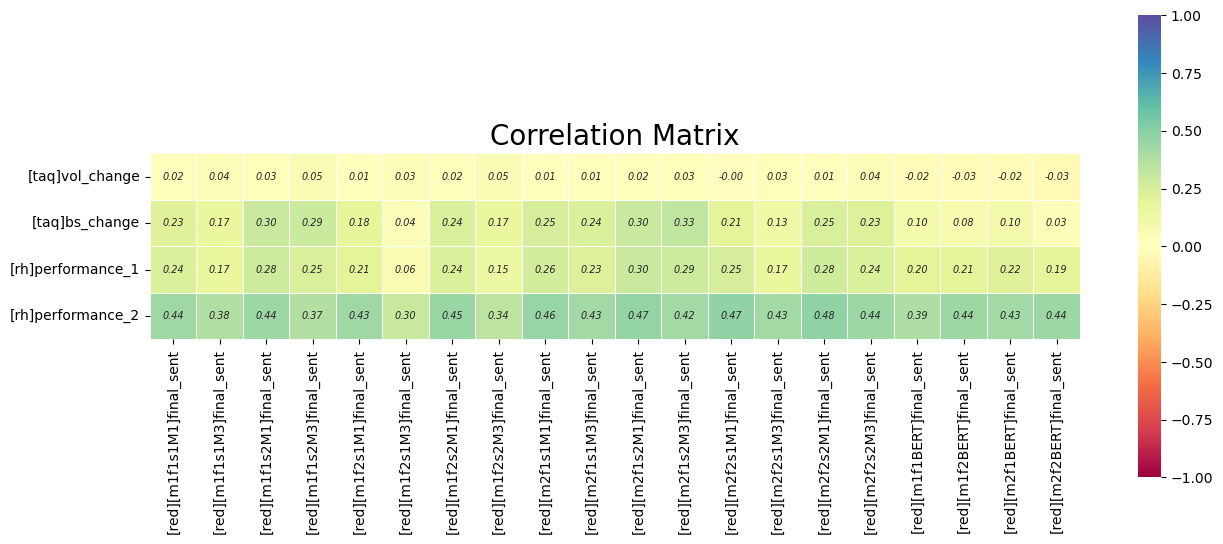

In [27]:
sentiment_reddit_corr("AAPL", rolling=30, lag=0)

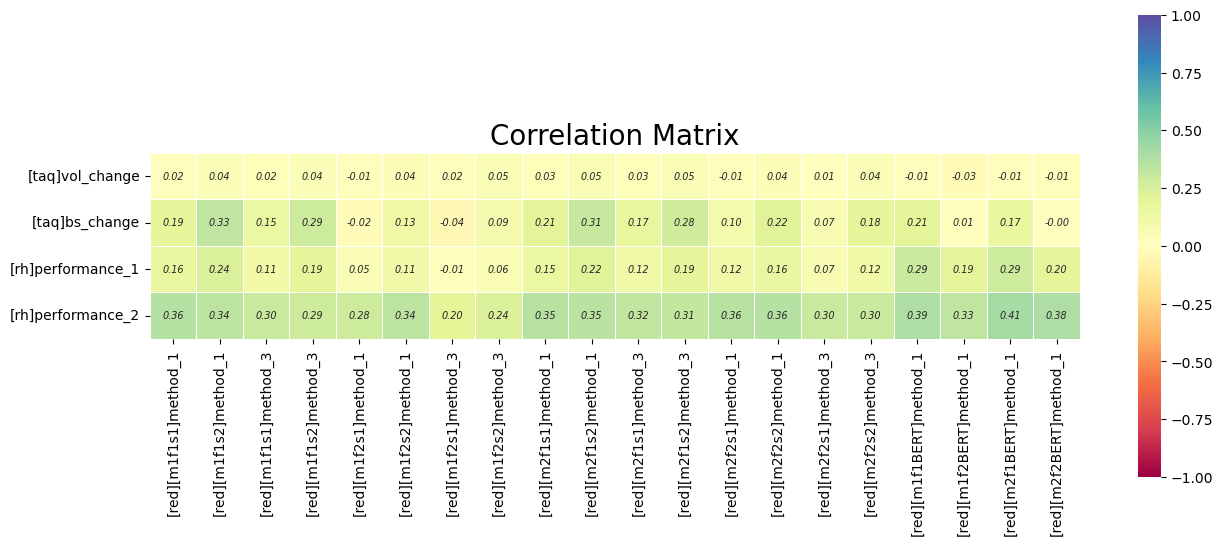

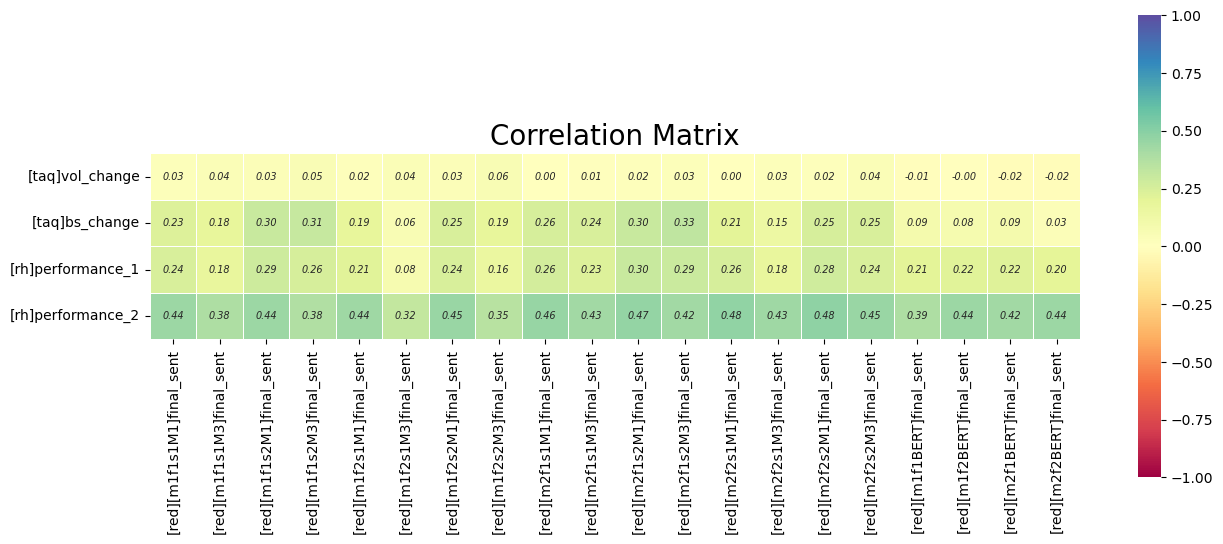

In [26]:
sentiment_reddit_corr("AAPL", rolling=30, lag=1)

## ToDo <a class="anchor" id="ToDo"></a>

[Go back up](#top)